In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
import numpy as np
import os
pd.options.display.float_format = '{:.2f}'.format
import math
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.stats.sandwich_covariance as sw

from plotnine import *
import statsmodels.formula.api as smf
from arch.unitroot import PhillipsPerron
from stargazer.stargazer import Stargazer


In [2]:
# Carregar o arquivo Excel
df = pd.read_excel("DataFrame_Valores.xlsx")
df

Ano    Freguesia  Pre√ßo_m2    N_AL      N_H    N_D  PIB_AML  IDE_CI_GL  \
0    2007        Ajuda   1941.00    0.00  8957.00   0.00 65807.06    1271.04   
1    2008        Ajuda   1785.25    0.00  8937.50   0.00 67581.69    1285.38   
2    2009        Ajuda   2099.30    0.00  8918.00   0.00 66436.60    1651.43   
3    2010        Ajuda   2030.13    0.00  8898.50   0.00 67732.97    1880.53   
4    2011        Ajuda   1681.89    0.00  8879.00   0.00 66343.85    2013.33   
..    ...          ...       ...     ...      ...    ...      ...        ...   
403  2019  S√£o Vicente   3735.44 1662.00 10202.60   0.00 77439.68    6128.30   
404  2020  S√£o Vicente   3797.13 1631.00 10189.30   0.00 71642.26    6329.82   
405  2021  S√£o Vicente   3926.75 1614.00 10176.00   0.00 76602.81    7171.80   
406  2022  S√£o Vicente   4241.94 1607.00 10162.70 133.34 87368.25    7782.02   
407  2023  S√£o Vicente   4566.58 1547.00 10149.40 162.05 96325.41    8073.10   

     perc_Juro  
0         4.82  
1         3.37  
2         1.00  
3         1.25  
4         1.67  
..         ...  
403      -0.34  
404      -0.52  
405      -0.55  
406       2.57  
407       3.92  

[408 rows x 9 columns]

In [3]:
# Definindo as agrega√ß√µes por coluna
aggregations = {
    'Pre√ßo_m2': 'mean',  
    'N_AL': 'sum',  
    'N_H': 'sum',
    'N_D': 'sum',
    'PIB_AML': 'mean',  
    'IDE_CI_GL': 'mean',
    'perc_Juro': 'mean'
}

# Aplicando o groupby com as agrega√ß√µes especificadas
df = df.groupby('Ano').agg(aggregations)
df = df.reset_index()

# Colocar a coluna 'Anos' como a primeira coluna
df['Anos'] = range(0, len(df))
df.insert(0, 'Anos', df.pop('Anos'))

df

Anos   Ano  Pre√ßo_m2     N_AL       N_H      N_D  PIB_AML  IDE_CI_GL  \
0      0  2007   2215.50    10.70 307534.60  6076.79 65807.06    1271.04   
1      1  2008   2123.53    21.40 311646.20  5588.03 67581.69    1285.38   
2      2  2009   2175.61    53.50 315757.80  5772.33 66436.60    1651.43   
3      3  2010   2038.49   107.00 319869.40  6252.49 67732.97    1880.53   
4      4  2011   1872.16   137.00 323981.00  6355.06 66343.85    2013.33   
5      5  2012   1699.70   227.00 323597.20  6789.17 62528.74    2034.74   
6      6  2013   1714.31   420.00 323213.40  7310.29 62955.03    2631.61   
7      7  2014   1841.89  1077.00 322829.60  8918.44 63145.81    3434.55   
8      8  2015   2061.18  3213.00 322445.80 10099.85 64897.10    4077.88   
9      9  2016   2361.65  6367.00 322062.00 11066.13 66942.30    4180.46   
10    10  2017   2904.39 10655.00 321678.20 12427.94 70359.44    4596.16   
11    11  2018   3466.95 14461.00 321294.40 13184.47 73602.66    4874.54   
12    12  2019   3827.94 19530.00 320910.60 14264.97 77439.68    6128.30   
13    13  2020   3951.38 19448.00 320526.80  3481.89 71642.26    6329.82   
14    14  2021   4225.50 19621.00 320143.00  5087.08 76602.81    7171.80   
15    15  2022   4725.55 20245.00 319759.20 13200.89 87368.25    7782.02   
16    16  2023   4983.55 19535.00 319375.40 16042.83 96325.41    8073.10   

    perc_Juro  
0        4.82  
1        3.37  
2        1.00  
3        1.25  
4        1.67  
5        0.32  
6        0.37  
7        0.18  
8       -0.04  
9       -0.22  
10      -0.27  
11      -0.24  
12      -0.34  
13      -0.52  
14      -0.55  
15       2.57  
16       3.92

In [4]:
# Dados fornecidos na tabela para Lisboa
data = {
    "Ano": [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Valor (‚Ç¨)": [2279, 2230, 2119, 2182, 1860, 1715, 1812, 1933, 2079, 2300,
                  2899, 3447, 3763, 3827, 4172, 4498, 4946]
}

# Criando um DataFrame a partir dos dados
df_values_Confidencial_Imobili√°rio = pd.DataFrame(data)

# Supondo que df √© o DataFrame existente que voc√™ possui
# Substituir a coluna 'Pre√ßo/m2' pelos novos valores
df['Pre√ßo_m2'] = df_values_Confidencial_Imobili√°rio['Valor (‚Ç¨)']

# Convert all columns to integers 64-bits except the "Taxa de Juro" column (note that int has a maximum value of 2,147,483,647)
cols_to_convert = df.columns.difference(['perc_Juro'])
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('int64'))
df

Anos   Ano  Pre√ßo_m2   N_AL     N_H    N_D  PIB_AML  IDE_CI_GL  perc_Juro
0      0  2007      2279     10  307534   6076    65807       1271       4.82
1      1  2008      2230     21  311646   5588    67581       1285       3.37
2      2  2009      2119     53  315757   5772    66436       1651       1.00
3      3  2010      2182    107  319869   6252    67732       1880       1.25
4      4  2011      1860    137  323981   6355    66343       2013       1.67
5      5  2012      1715    227  323597   6789    62528       2034       0.32
6      6  2013      1812    420  323213   7310    62955       2631       0.37
7      7  2014      1933   1077  322829   8918    63145       3434       0.18
8      8  2015      2079   3213  322445  10099    64897       4077      -0.04
9      9  2016      2300   6367  322062  11066    66942       4180      -0.22
10    10  2017      2899  10655  321678  12427    70359       4596      -0.27
11    11  2018      3447  14461  321294  13184    73602       4874      -0.24
12    12  2019      3763  19530  320910  14264    77439       6128      -0.34
13    13  2020      3827  19448  320526   3481    71642       6329      -0.52
14    14  2021      4172  19621  320143   5087    76602       7171      -0.55
15    15  2022      4498  20245  319759  13200    87368       7782       2.57
16    16  2023      4946  19535  319375  16042    96325       8073       3.92

## Novas Vari√°veis

In [5]:
df['perc_AL_H'] = (df['N_AL']/df['N_H'])*100

df.loc[df['Ano'] > 2011, 'perc_AL_H'] = (df['N_AL']/(df['N_H']+df['N_AL']))*100

df['log_Pre√ßo_m2'] = np.log(df['Pre√ßo_m2'])

df['log_N_AL'] = np.log(df['N_AL'])

df

Anos   Ano  Pre√ßo_m2   N_AL     N_H    N_D  PIB_AML  IDE_CI_GL  perc_Juro  \
0      0  2007      2279     10  307534   6076    65807       1271       4.82   
1      1  2008      2230     21  311646   5588    67581       1285       3.37   
2      2  2009      2119     53  315757   5772    66436       1651       1.00   
3      3  2010      2182    107  319869   6252    67732       1880       1.25   
4      4  2011      1860    137  323981   6355    66343       2013       1.67   
5      5  2012      1715    227  323597   6789    62528       2034       0.32   
6      6  2013      1812    420  323213   7310    62955       2631       0.37   
7      7  2014      1933   1077  322829   8918    63145       3434       0.18   
8      8  2015      2079   3213  322445  10099    64897       4077      -0.04   
9      9  2016      2300   6367  322062  11066    66942       4180      -0.22   
10    10  2017      2899  10655  321678  12427    70359       4596      -0.27   
11    11  2018      3447  14461  321294  13184    73602       4874      -0.24   
12    12  2019      3763  19530  320910  14264    77439       6128      -0.34   
13    13  2020      3827  19448  320526   3481    71642       6329      -0.52   
14    14  2021      4172  19621  320143   5087    76602       7171      -0.55   
15    15  2022      4498  20245  319759  13200    87368       7782       2.57   
16    16  2023      4946  19535  319375  16042    96325       8073       3.92   

    perc_AL_H  log_Pre√ßo_m2  log_N_AL  
0        0.00          7.73      2.30  
1        0.01          7.71      3.04  
2        0.02          7.66      3.97  
3        0.03          7.69      4.67  
4        0.04          7.53      4.92  
5        0.07          7.45      5.42  
6        0.13          7.50      6.04  
7        0.33          7.57      6.98  
8        0.99          7.64      8.07  
9        1.94          7.74      8.76  
10       3.21          7.97      9.27  
11       4.31          8.15      9.58  
12       5.74          8.23      9.88  
13       5.72          8.25      9.88  
14       5.77          8.34      9.88  
15       5.95          8.41      9.92  
16       5.76          8.51      9.88

## Gr√°ficos das vari√°veis

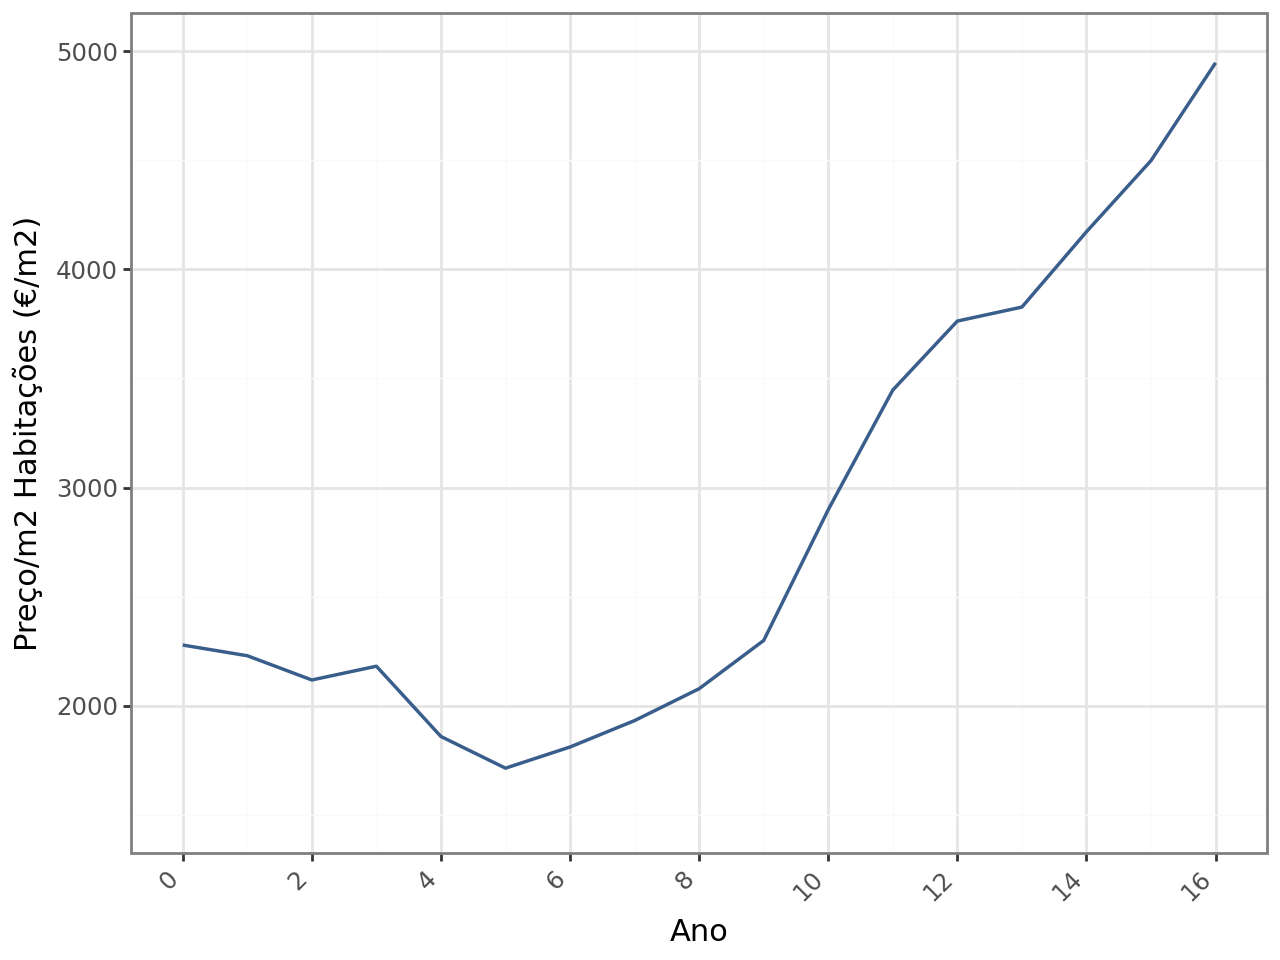

In [6]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="Pre√ßo_m2"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="Pre√ßo/m2 Habita√ß√µes (‚Ç¨/m2)")
    + scale_y_continuous(limits=[1500, 5000], breaks=[2000, 3000, 4000, 5000])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

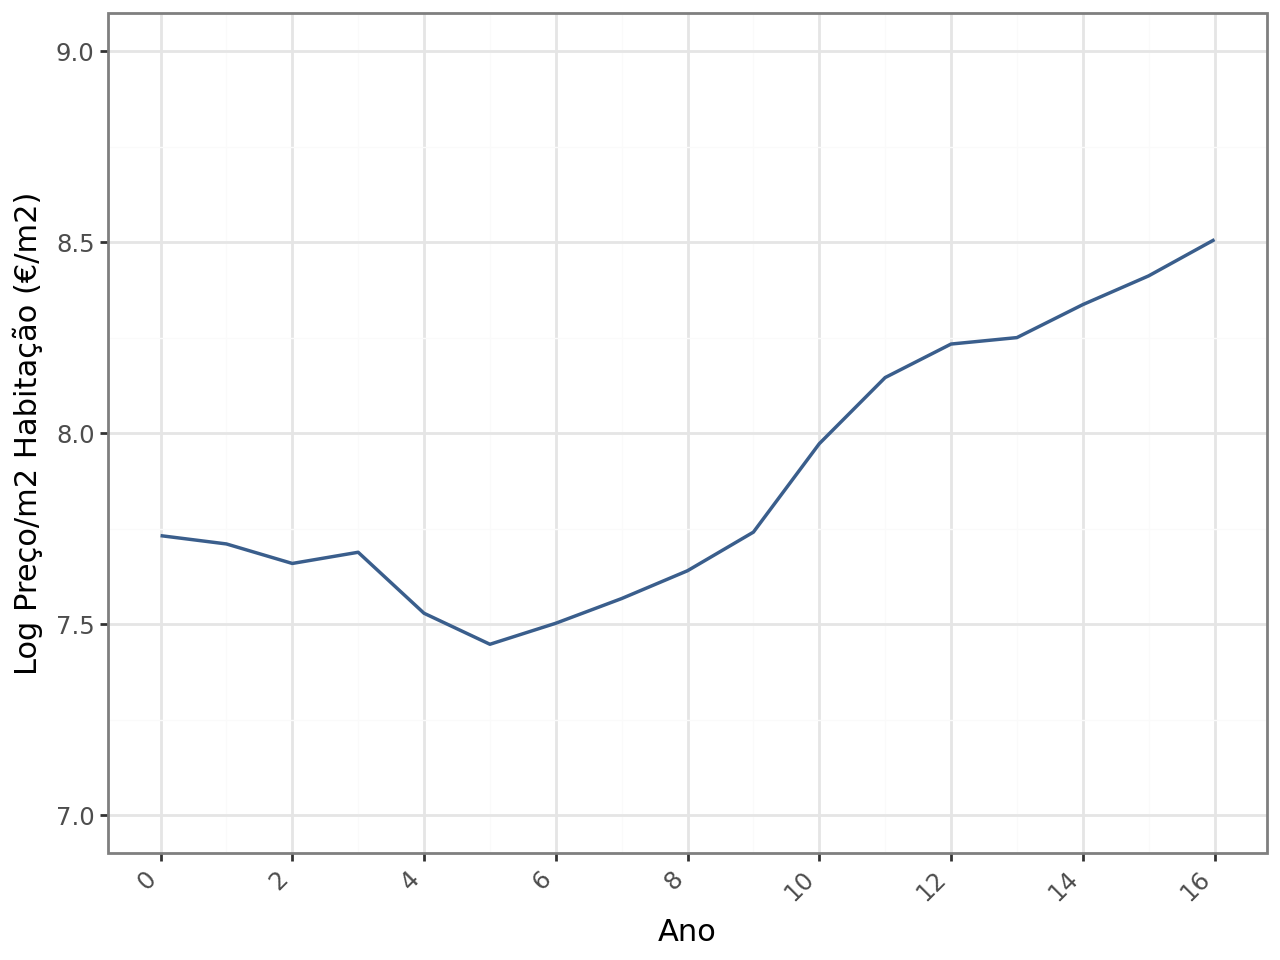

In [7]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="log_Pre√ßo_m2"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="Log Pre√ßo/m2 Habita√ß√£o (‚Ç¨/m2)")
    + scale_y_continuous(limits=[7, 9], breaks=[7, 7.5, 8, 8.5, 9])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

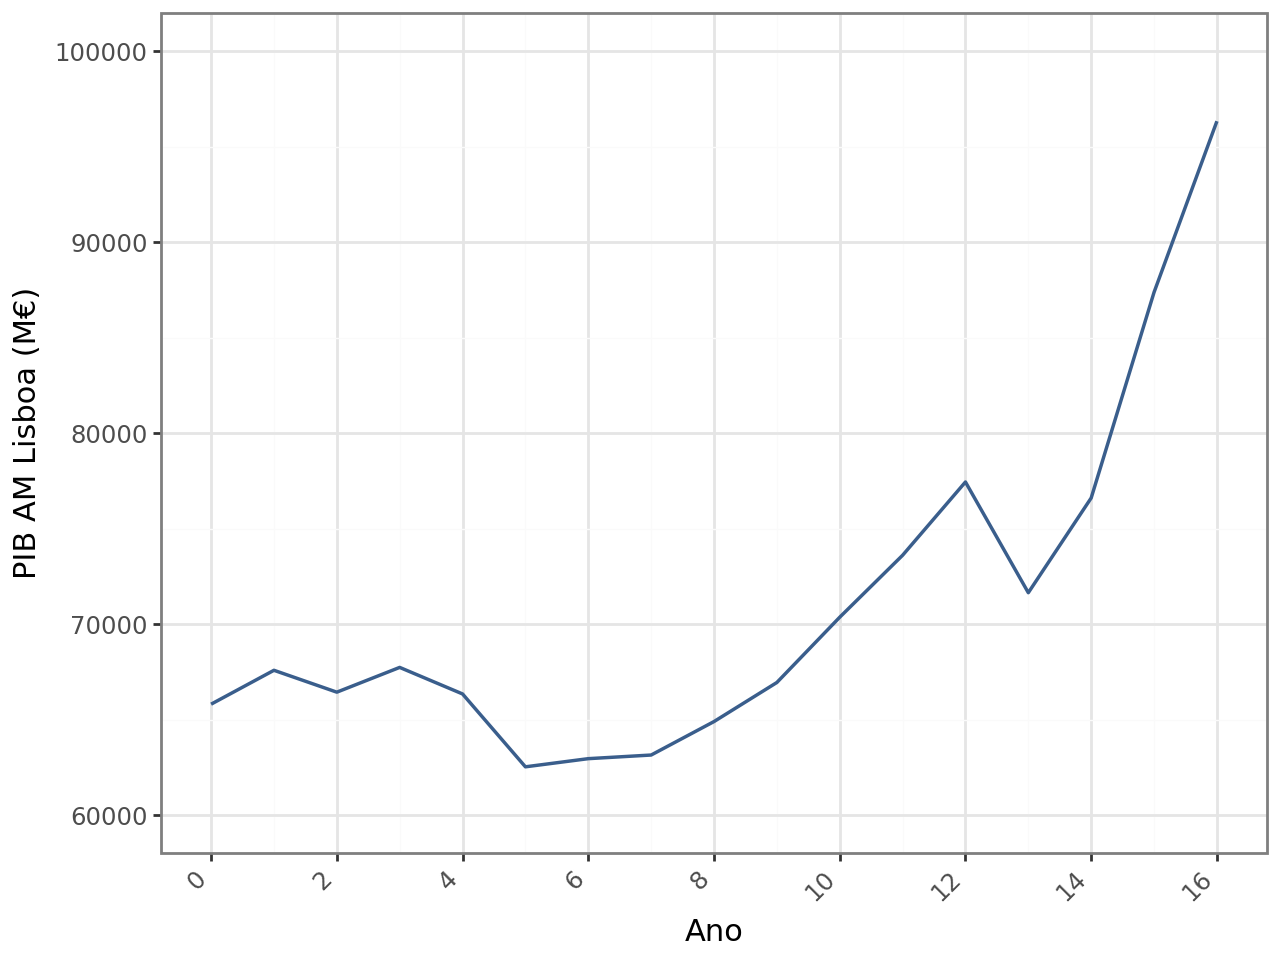

In [8]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="PIB_AML"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="PIB AM Lisboa (M‚Ç¨)")
    + scale_y_continuous(limits=[6E4, 10E4], breaks=[6E4, 7E4, 8E4, 9E4, 10E4])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

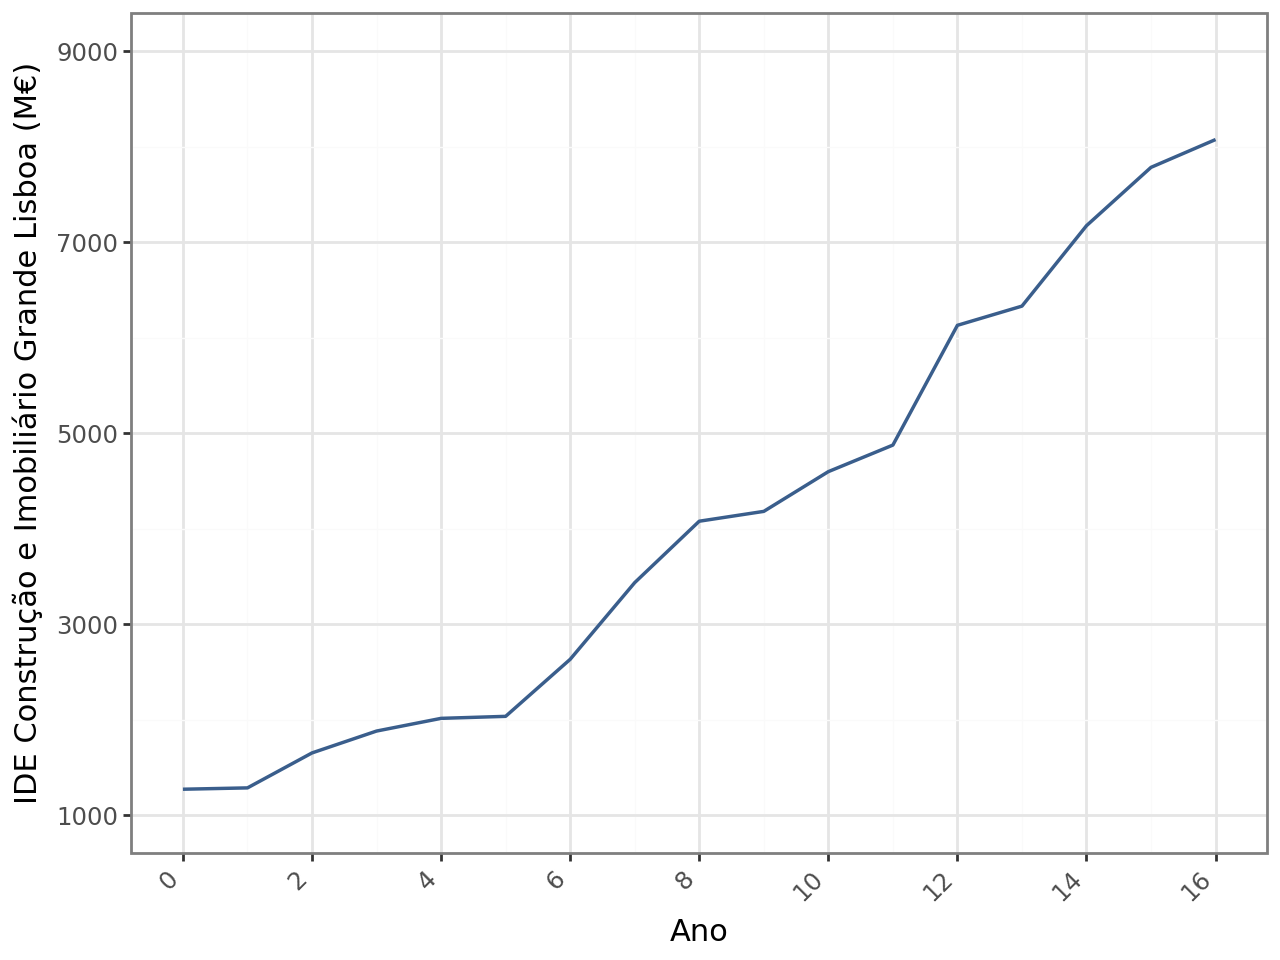

In [9]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="IDE_CI_GL"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="IDE Constru√ß√£o e Imobili√°rio Grande Lisboa (M‚Ç¨)")
    + scale_y_continuous(limits=[1000, 9000], breaks=[1000, 3000, 5000, 7000, 9000])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

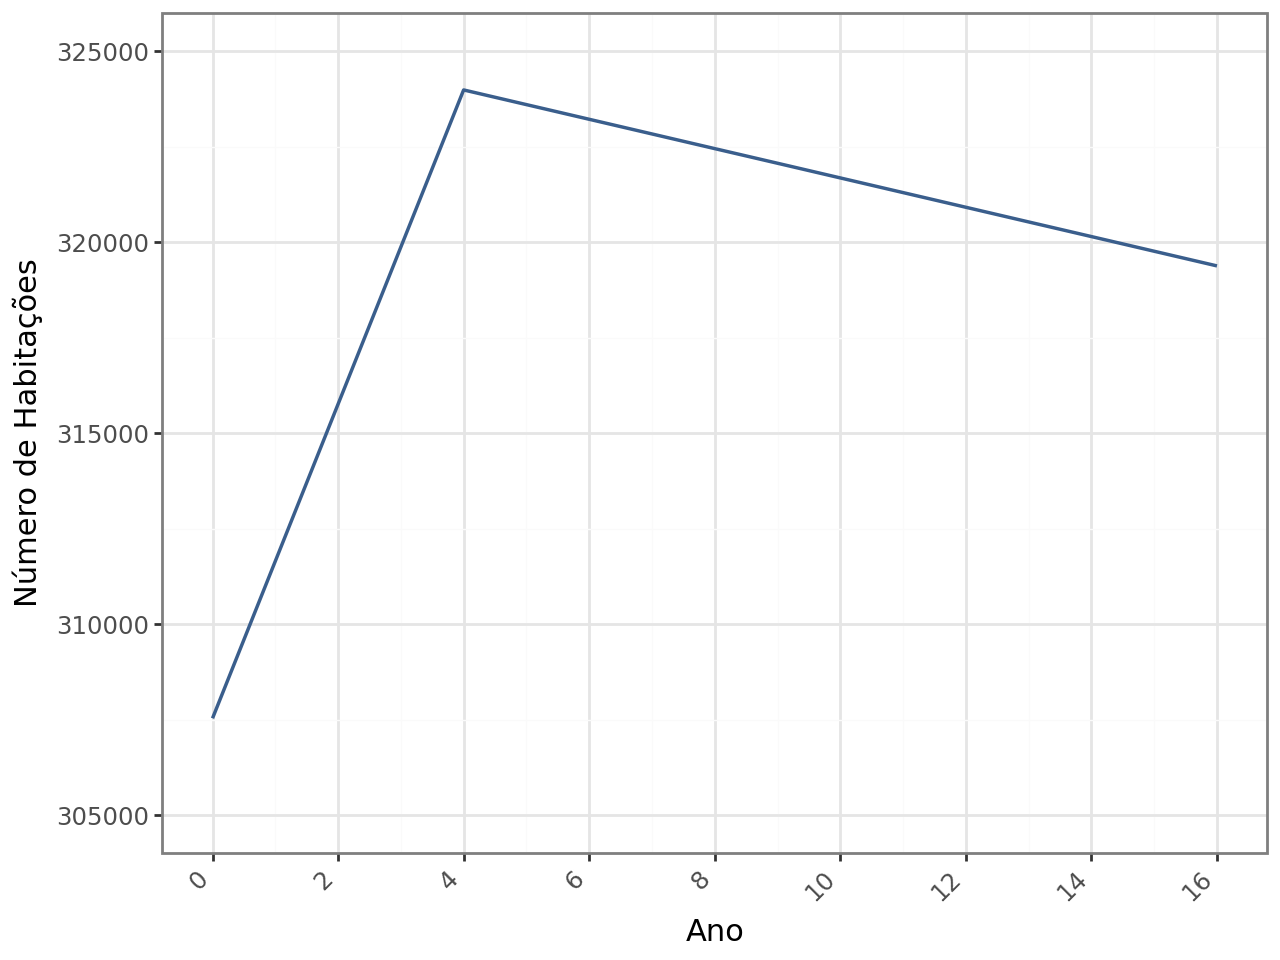

In [10]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="N_H"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="N√∫mero de Habita√ß√µes")
    + scale_y_continuous(limits=[305000, 325000], breaks=[305000, 310000, 315000, 320000, 325000])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

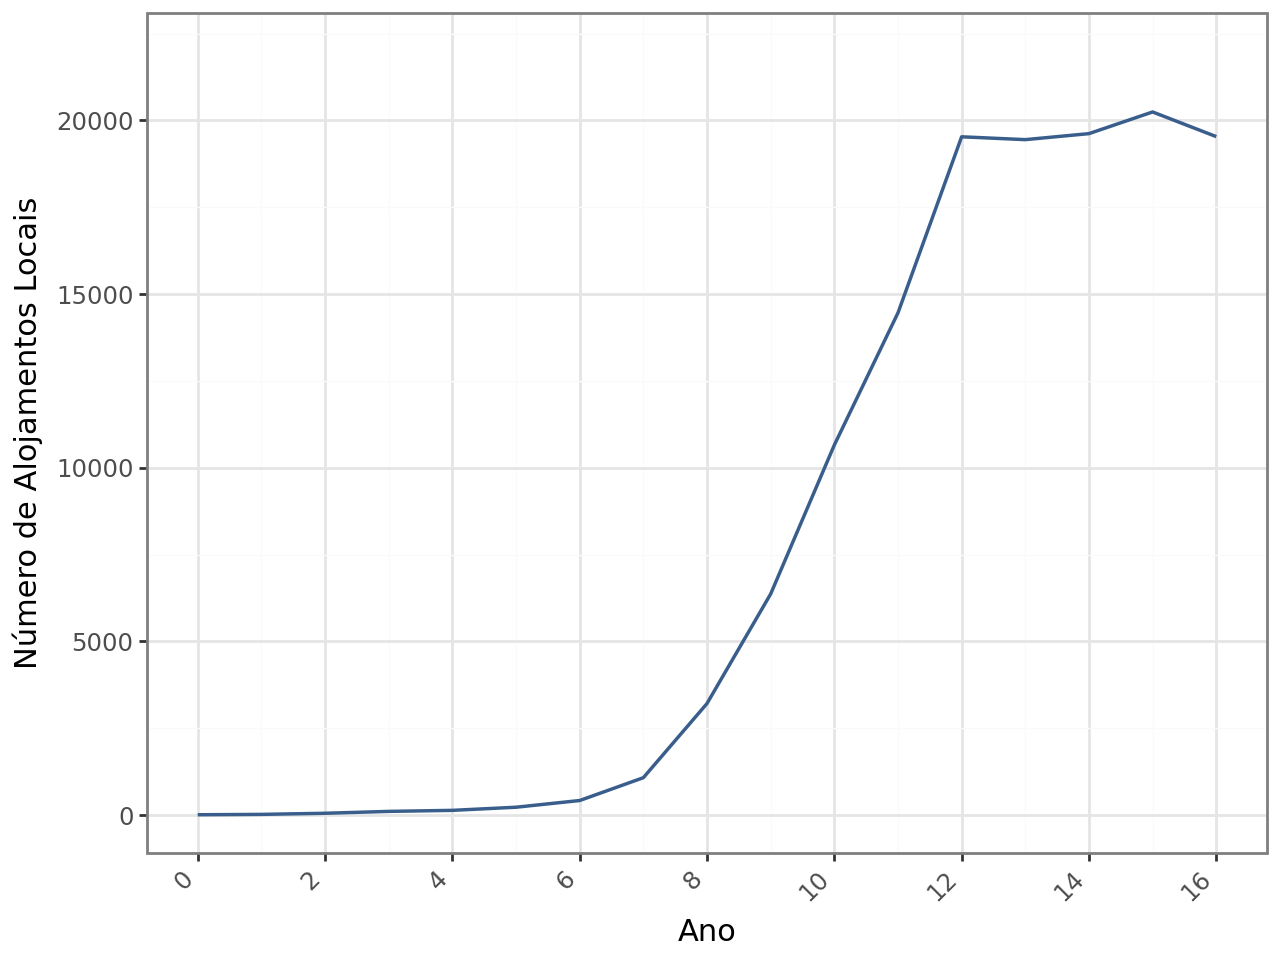

In [11]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="N_AL"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="N√∫mero de Alojamentos Locais")
    + scale_y_continuous(limits=[0, 22000], breaks=[0, 5000, 10000, 15000, 20000])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

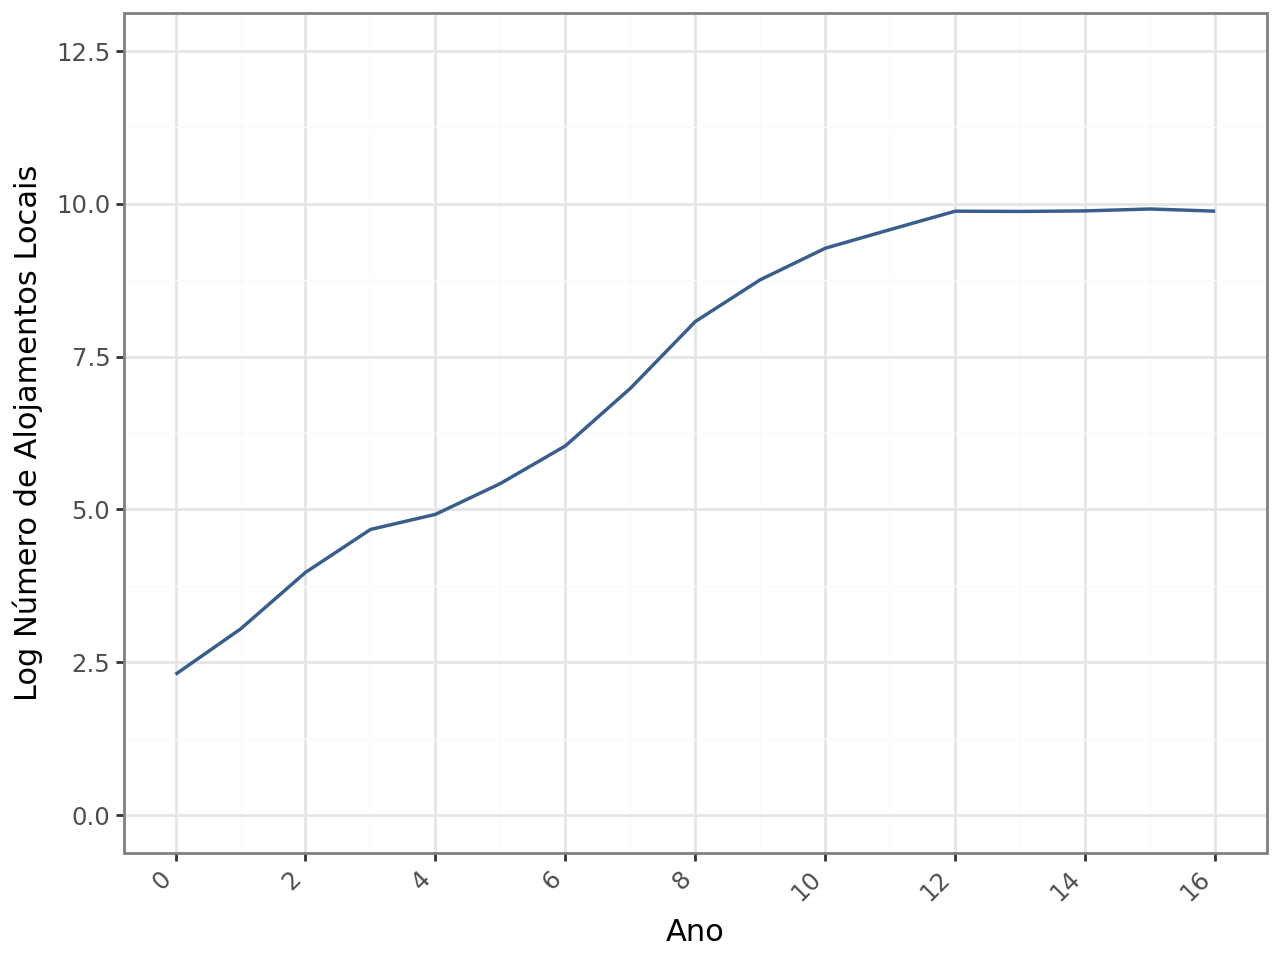

In [12]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="log_N_AL"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="Log N√∫mero de Alojamentos Locais")
    + scale_y_continuous(limits=[0, 12.5], breaks=[0, 2.5, 5, 7.5, 10, 12.5])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

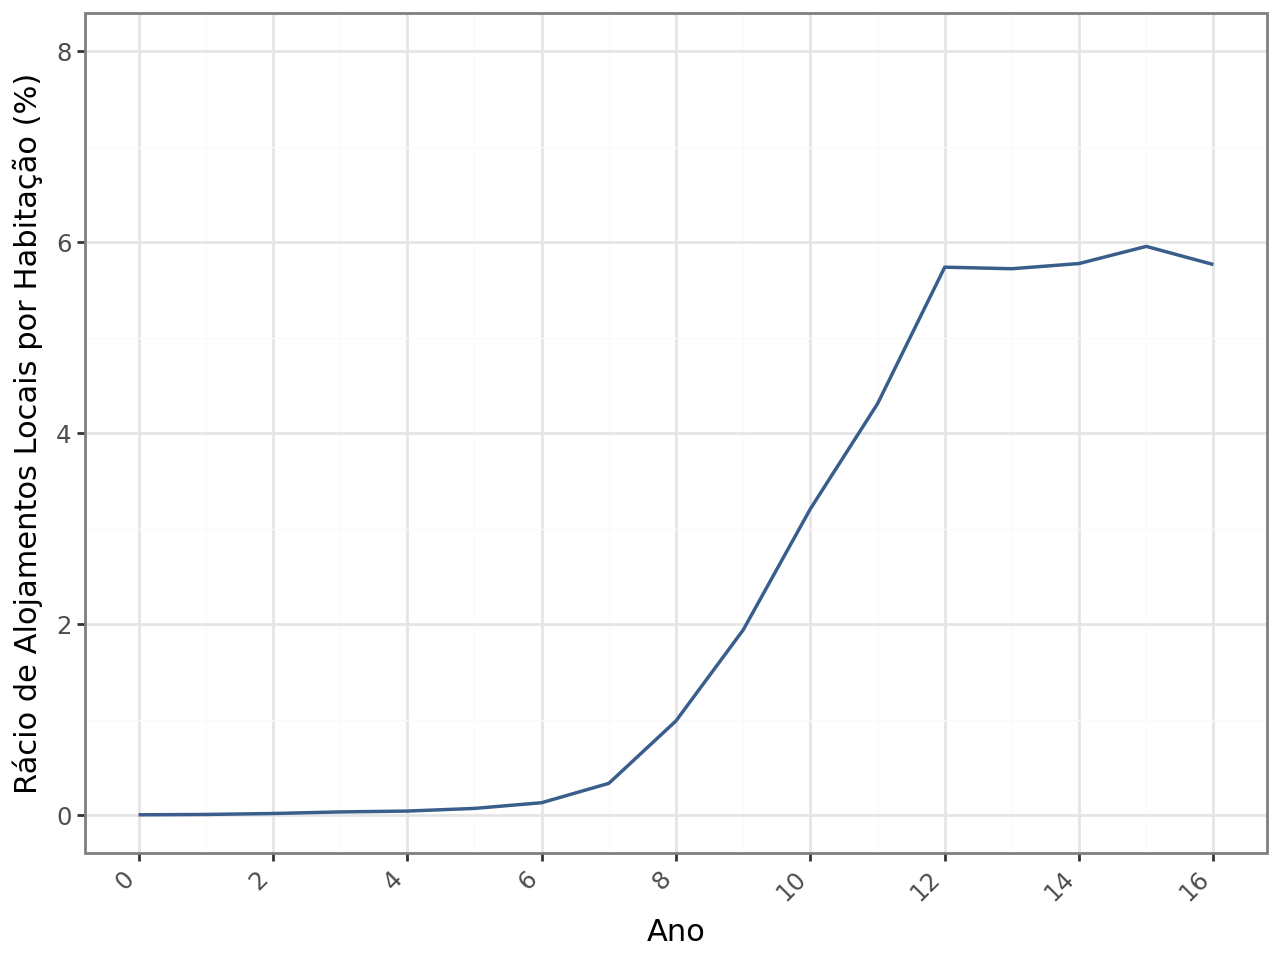

In [13]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="perc_AL_H"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="R√°cio de Alojamentos Locais por Habita√ß√£o (%)")
    + scale_y_continuous(limits=[0, 8], breaks=[0, 2, 4, 6, 8])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

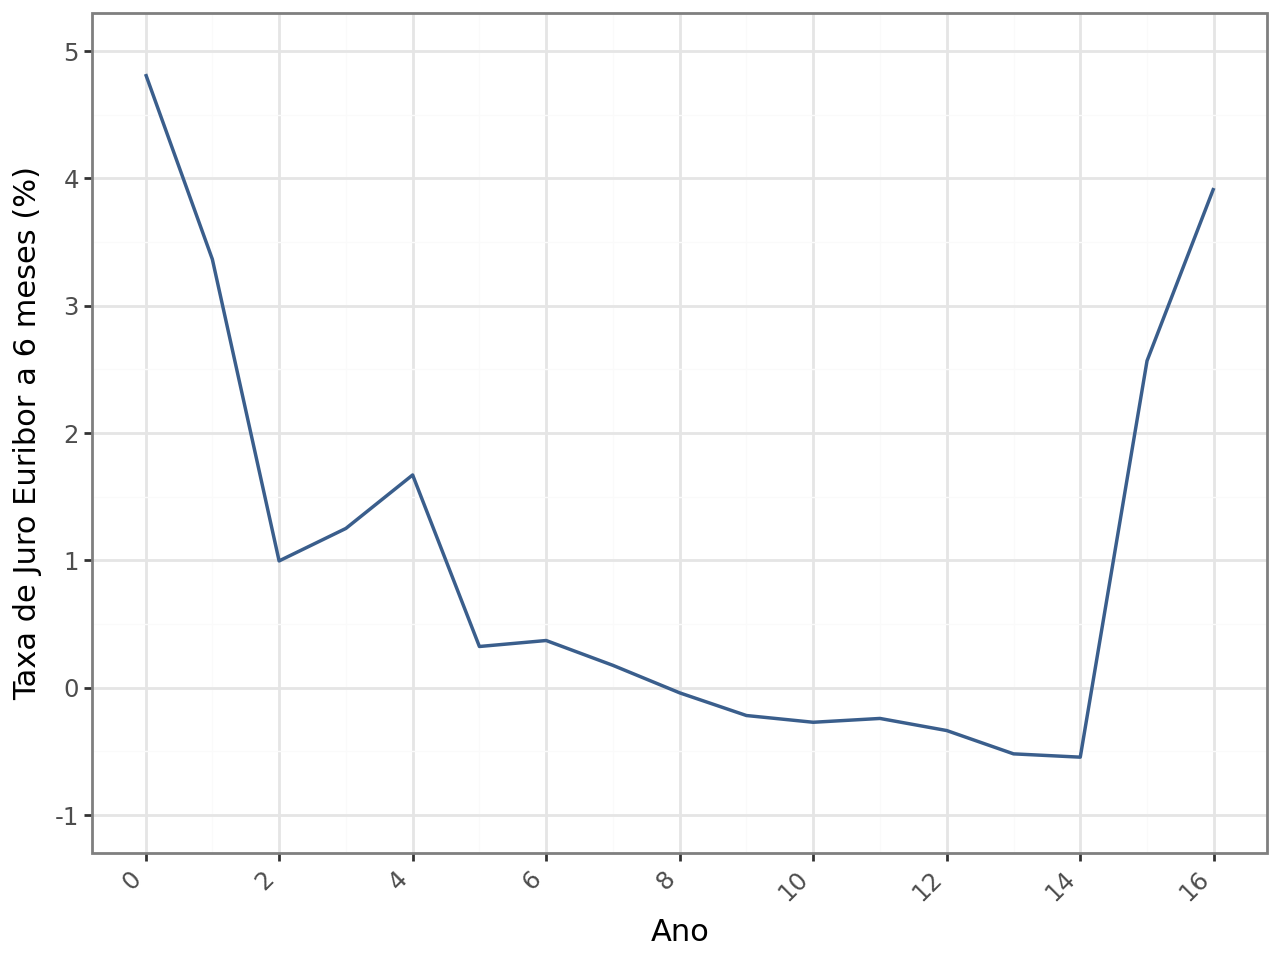

In [14]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="perc_Juro"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="Taxa de Juro Euribor a 6 meses (%)")
    + scale_y_continuous(limits=[-1, 5], breaks=[-1, 0, 1, 2, 3, 4, 5])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

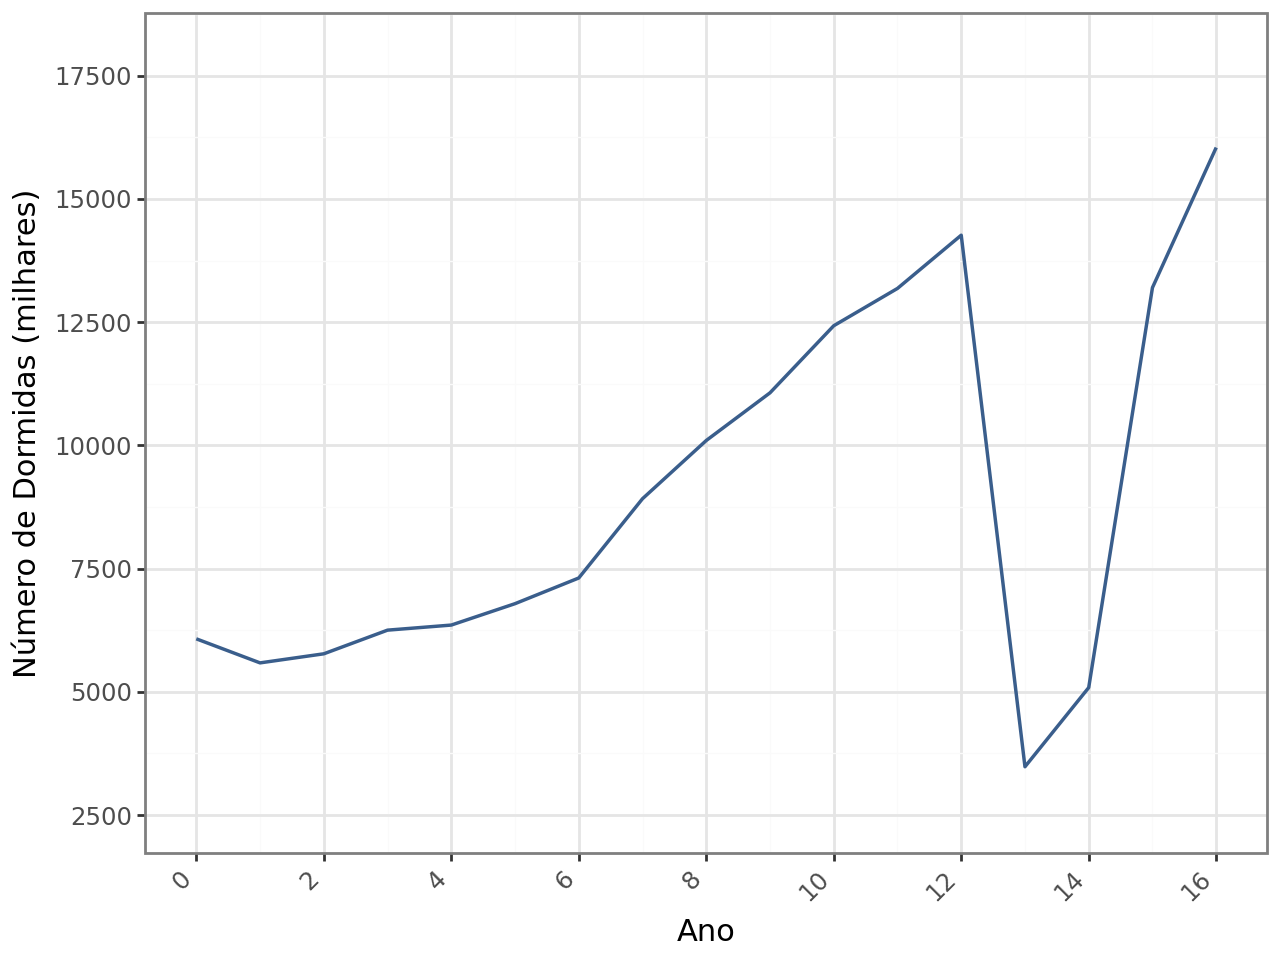

In [15]:
g1 = (
    ggplot(data=df)
    + geom_line(aes(x="Anos", y="N_D"), colour="#3a5e8cFF", size=0.7)
    + labs(x="Ano", y="N√∫mero de Dormidas (milhares)")
    + scale_y_continuous(limits=[2500, 18000], breaks=[2500, 5000, 7500, 10000, 12500, 15000, 17500])
    + scale_x_continuous(breaks=[0,2,4,6,8,10,12,14,16])
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)
g1

# 6. Verificar Tipo de tendencia

### Modelo Linear

Regress√£o Linear para 'PRE√áO_M2':
                            OLS Regression Results                            
Dep. Variable:               Pre√ßo_m2   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     42.06
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.03e-05
Time:                        00:13:10   Log-Likelihood:                -130.57
No. Observations:                  17   AIC:                             265.1
Df Residuals:                      15   BIC:                             266.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.5

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


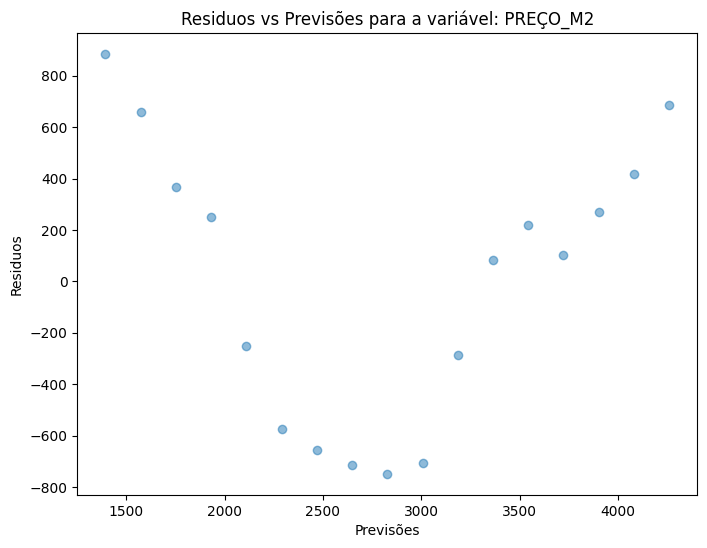

Regress√£o Linear para 'N_AL':
                            OLS Regression Results                            
Dep. Variable:                   N_AL   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     90.39
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           9.67e-08
Time:                        00:13:10   Log-Likelihood:                -161.42
No. Observations:                  17   AIC:                             326.8
Df Residuals:                      15   BIC:                             328.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.241e+06

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


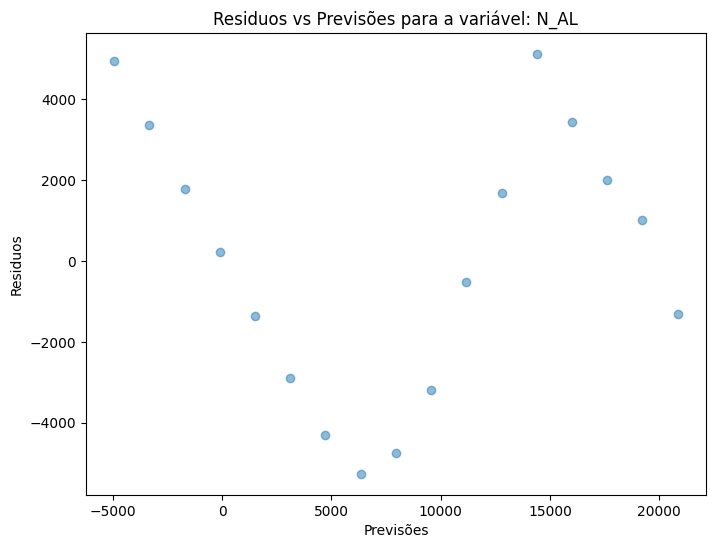

Regress√£o Linear para 'N_H':
                            OLS Regression Results                            
Dep. Variable:                    N_H   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.755
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0717
Time:                        00:13:10   Log-Likelihood:                -164.22
No. Observations:                  17   AIC:                             332.4
Df Residuals:                      15   BIC:                             334.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.61e+05 

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


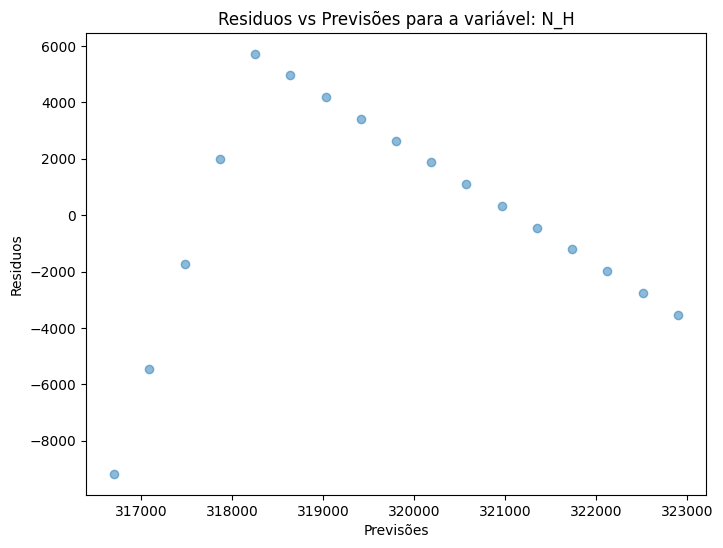

Regress√£o Linear para 'N_D':
                            OLS Regression Results                            
Dep. Variable:                    N_D   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     7.767
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0138
Time:                        00:13:11   Log-Likelihood:                -160.08
No. Observations:                  17   AIC:                             324.2
Df Residuals:                      15   BIC:                             325.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.714e+05 

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


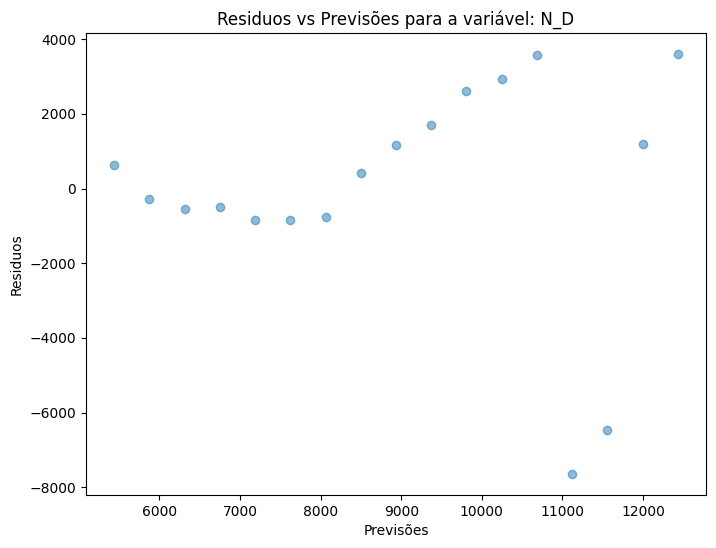

Regress√£o Linear para 'PIB_AML':
                            OLS Regression Results                            
Dep. Variable:                PIB_AML   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     20.31
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000418
Time:                        00:13:11   Log-Likelihood:                -171.36
No. Observations:                  17   AIC:                             346.7
Df Residuals:                      15   BIC:                             348.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.692e

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


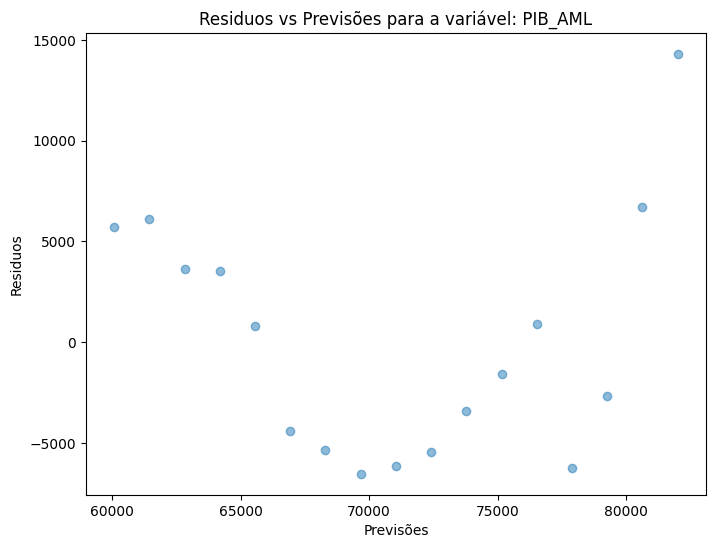

Regress√£o Linear para 'IDE_CI_GL':
                            OLS Regression Results                            
Dep. Variable:              IDE_CI_GL   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     423.1
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.10e-12
Time:                        00:13:11   Log-Likelihood:                -126.73
No. Observations:                  17   AIC:                             257.5
Df Residuals:                      15   BIC:                             259.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.09

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


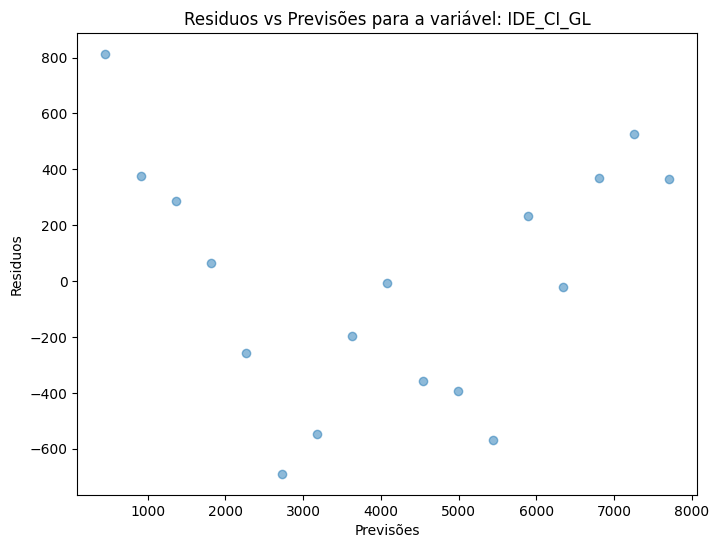

Regress√£o Linear para 'PERC_JURO':
                            OLS Regression Results                            
Dep. Variable:              perc_Juro   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.598
Date:                Mon, 05 Aug 2024   Prob (F-statistic):              0.225
Time:                        00:13:11   Log-Likelihood:                -31.615
No. Observations:                  17   AIC:                             67.23
Df Residuals:                      15   BIC:                             68.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        209

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


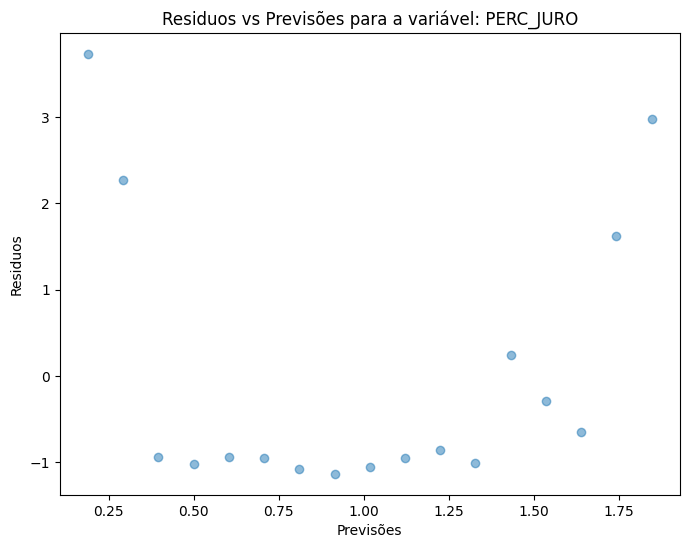

Regress√£o Linear para 'PERC_AL_H':
                            OLS Regression Results                            
Dep. Variable:              perc_AL_H   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     92.63
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           8.25e-08
Time:                        00:13:12   Log-Likelihood:                -23.019
No. Observations:                  17   AIC:                             50.04
Df Residuals:                      15   BIC:                             51.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -955

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


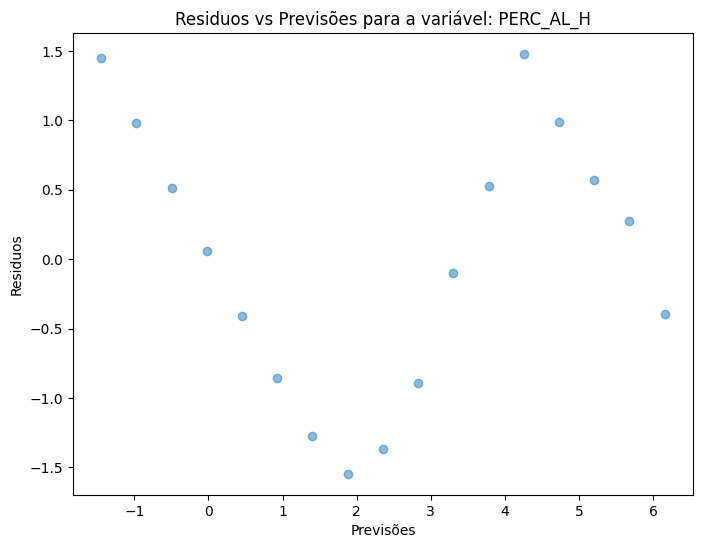

Regress√£o Linear para 'LOG_PRE√áO_M2':
                            OLS Regression Results                            
Dep. Variable:           log_Pre√ßo_m2   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     36.85
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.14e-05
Time:                        00:13:12   Log-Likelihood:                 4.6616
No. Observations:                  17   AIC:                            -5.323
Df Residuals:                      15   BIC:                            -3.657
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


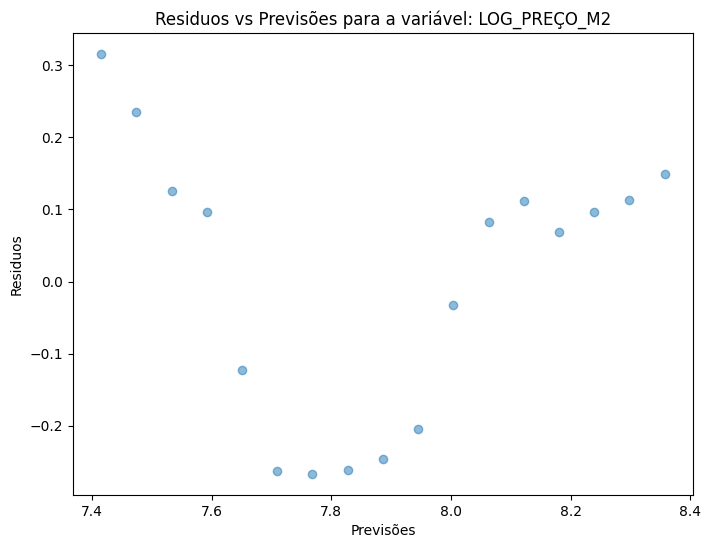

Regress√£o Linear para 'LOG_N_AL':
                            OLS Regression Results                            
Dep. Variable:               log_N_AL   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           4.57e-10
Time:                        00:13:12   Log-Likelihood:                -17.923
No. Observations:                  17   AIC:                             39.85
Df Residuals:                      15   BIC:                             41.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1033.

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


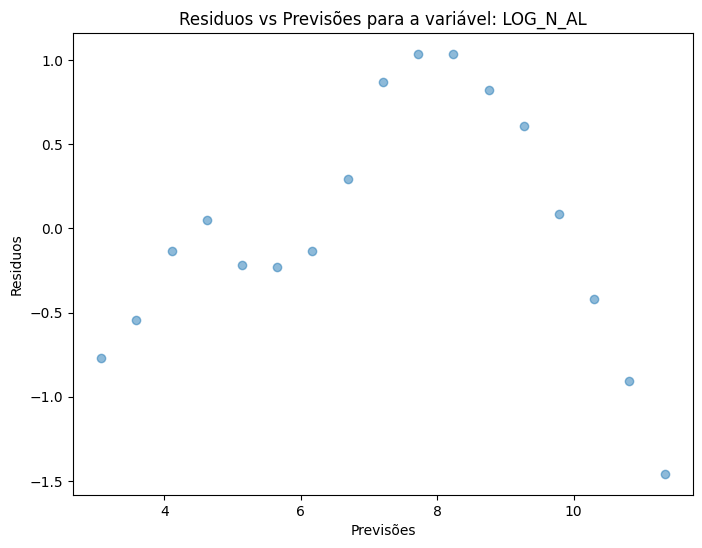

In [16]:
# Lista para armazenar os resultados de regress√£o
regression_results = []

# Iterar sobre as colunas num√©ricas, exceto as coluna de anos
for column in df.columns[2:]:  # Ignorando as duas primeiras colunas que se referem aos anos
    # Realizar a regress√£o linear
    X = sm.add_constant(df['Ano'])  # Adicionar uma coluna de 1s para o termo constante
    y = df[column]
    model = sm.OLS(y, X).fit()
    
    # Adicionar os resultados √† nossa lista
    regression_results.append((column, model))

# Agora, vamos imprimir o summary para cada regress√£o linear e gerar os gr√°ficos de res√≠duos vs. previs√µes
for column, model in regression_results:
    print(f"\033[1mRegress√£o Linear para '{column.upper()}':\033[0m")
    print(model.summary())
    print("="*80)
    
    # Gerar o gr√°fico de res√≠duos vs. previs√µes
    y_pred = model.predict(X)
    residuos = model.resid
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuos, alpha=0.5)
    plt.title(f'Residuos vs Previs√µes para a vari√°vel: {column.upper()}')
    plt.xlabel('Previs√µes')
    plt.ylabel('Residuos')
    plt.show()

### Modelo Exponencial

C:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


Regress√£o Linear para 'LOG_N_AL':
                            OLS Regression Results                            
Dep. Variable:               log_N_AL   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           4.57e-10
Time:                        00:13:13   Log-Likelihood:                -17.923
No. Observations:                  17   AIC:                             39.85
Df Residuals:                      15   BIC:                             41.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.

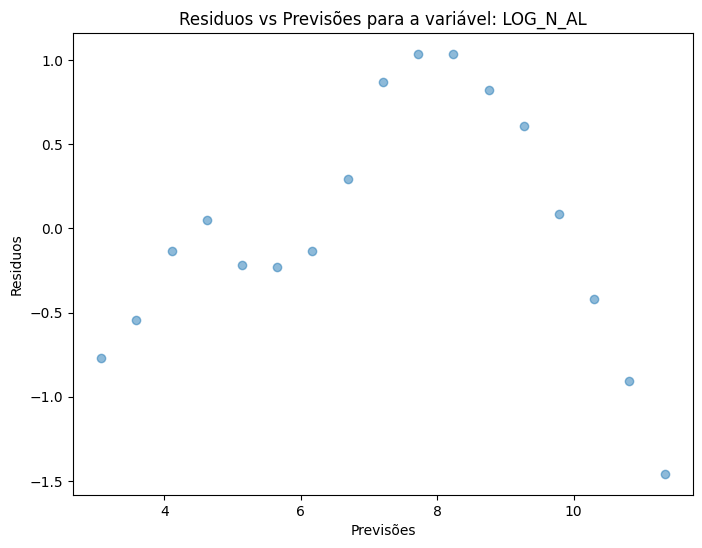

Regress√£o Linear para 'PRE√áO_M2 LOG':
                            OLS Regression Results                            
Dep. Variable:           Pre√ßo_m2 log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     36.85
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.14e-05
Time:                        00:13:14   Log-Likelihood:                 4.6616
No. Observations:                  17   AIC:                            -5.323
Df Residuals:                      15   BIC:                            -3.657
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


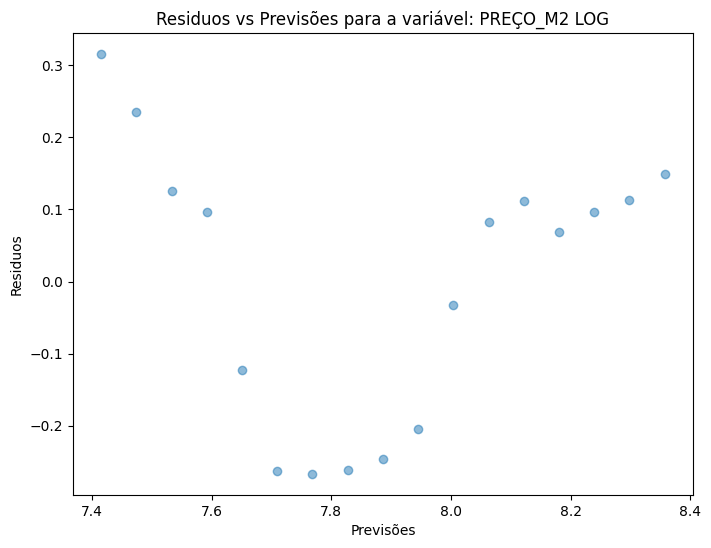

Regress√£o Linear para 'N_AL LOG':
                            OLS Regression Results                            
Dep. Variable:               N_AL log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     199.2
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           4.57e-10
Time:                        00:13:14   Log-Likelihood:                -17.923
No. Observations:                  17   AIC:                             39.85
Df Residuals:                      15   BIC:                             41.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


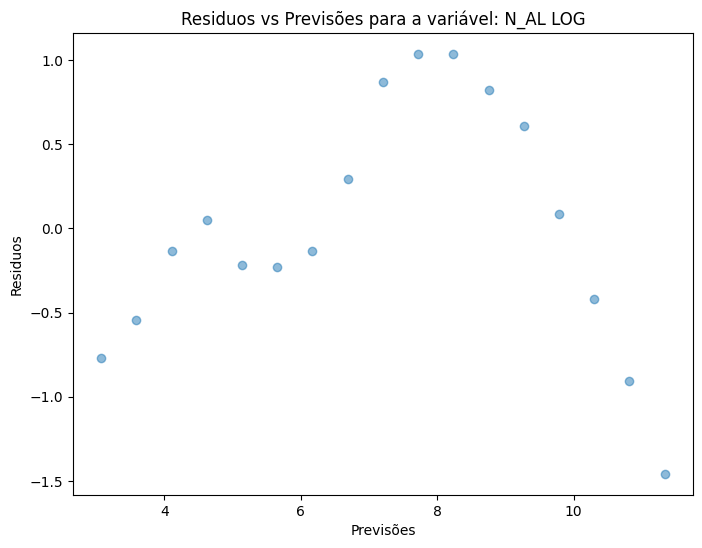

Regress√£o Linear para 'N_H LOG':
                            OLS Regression Results                            
Dep. Variable:                N_H log   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3.824
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0694
Time:                        00:13:14   Log-Likelihood:                 51.095
No. Observations:                  17   AIC:                            -98.19
Df Residuals:                      15   BIC:                            -96.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


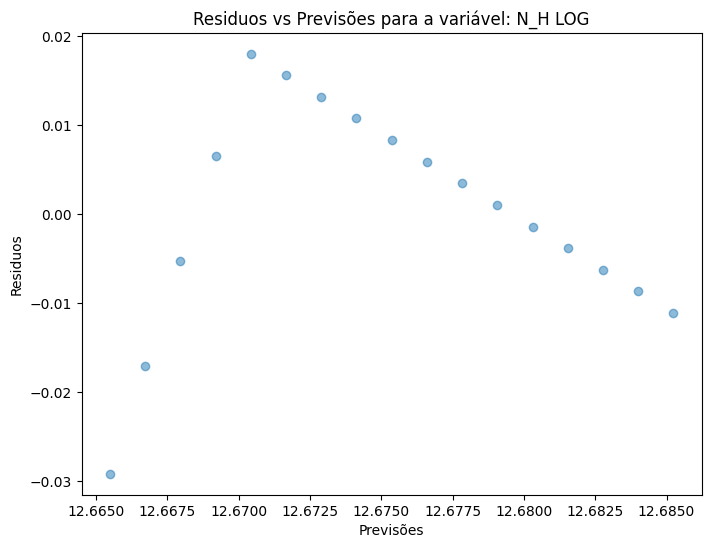

Regress√£o Linear para 'N_D LOG':
                            OLS Regression Results                            
Dep. Variable:                N_D log   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4.300
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0558
Time:                        00:13:14   Log-Likelihood:                -7.3252
No. Observations:                  17   AIC:                             18.65
Df Residuals:                      15   BIC:                             20.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


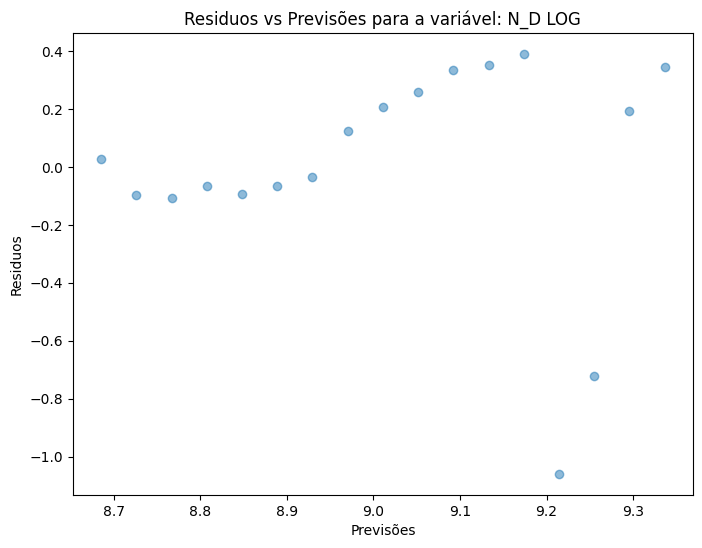

Regress√£o Linear para 'PIB_AML LOG':
                            OLS Regression Results                            
Dep. Variable:            PIB_AML log   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     21.61
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000315
Time:                        00:13:15   Log-Likelihood:                 20.205
No. Observations:                  17   AIC:                            -36.41
Df Residuals:                      15   BIC:                            -34.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


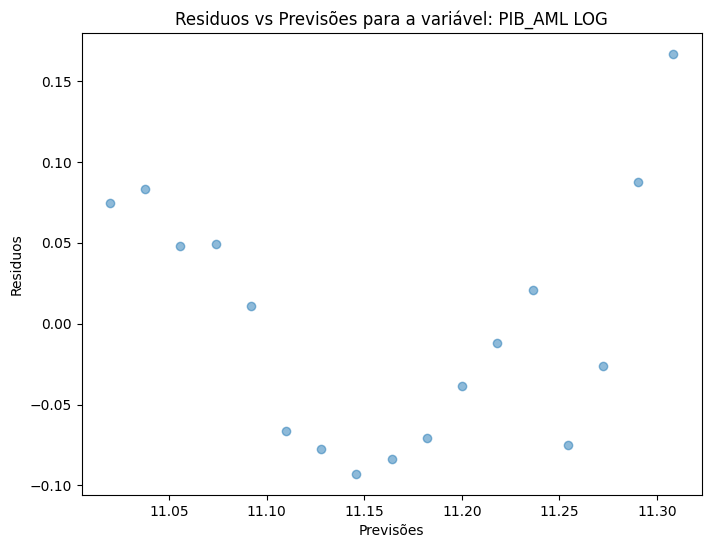

Regress√£o Linear para 'IDE_CI_GL LOG':
                            OLS Regression Results                            
Dep. Variable:          IDE_CI_GL log   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     791.4
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.15e-14
Time:                        00:13:15   Log-Likelihood:                 18.036
No. Observations:                  17   AIC:                            -32.07
Df Residuals:                      15   BIC:                            -30.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


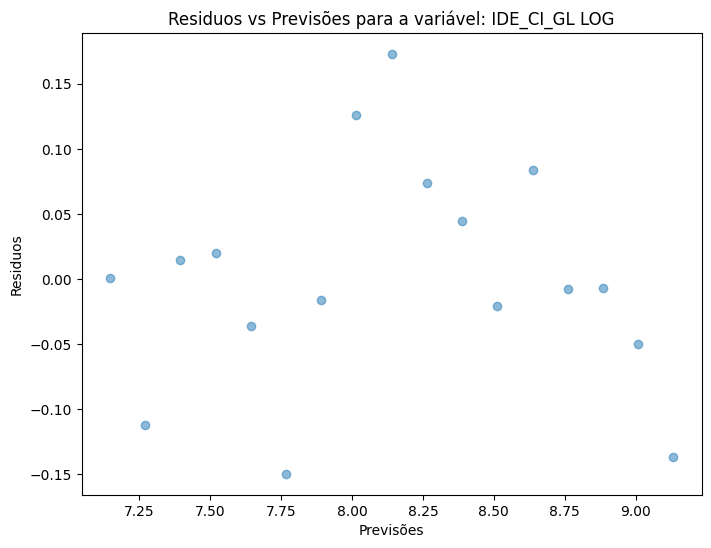

Regress√£o Linear para 'PERC_JURO LOG':
                            OLS Regression Results                            
Dep. Variable:          perc_Juro log   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                nan
Time:                        00:13:15   Log-Likelihood:                    nan
No. Observations:                  17   AIC:                               nan
Df Residuals:                      15   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

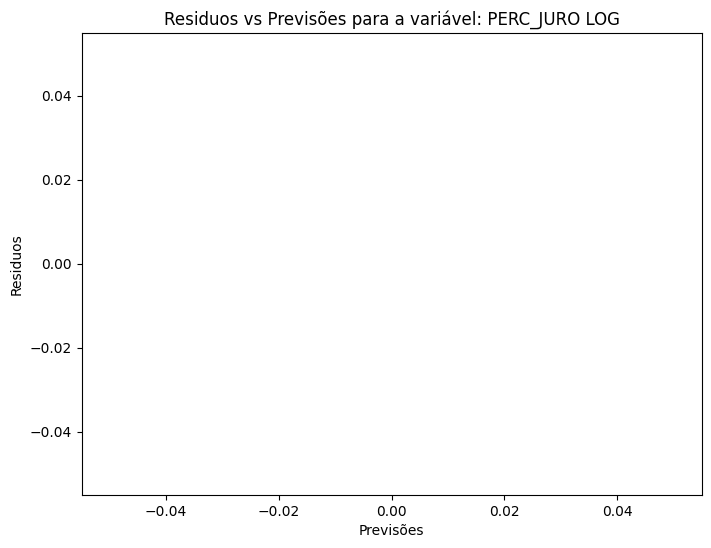

Regress√£o Linear para 'PERC_AL_H LOG':
                            OLS Regression Results                            
Dep. Variable:          perc_AL_H log   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           5.02e-10
Time:                        00:13:16   Log-Likelihood:                -17.833
No. Observations:                  17   AIC:                             39.67
Df Residuals:                      15   BIC:                             41.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


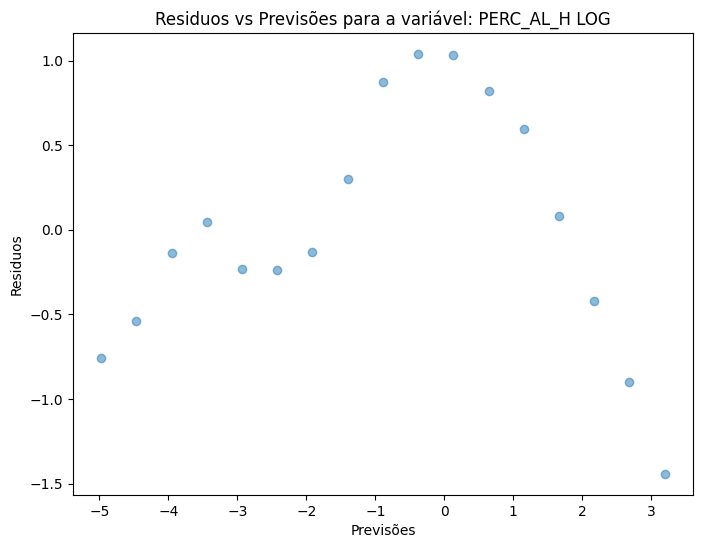

Regress√£o Linear para 'LOG_PRE√áO_M2 LOG':
                            OLS Regression Results                            
Dep. Variable:       log_Pre√ßo_m2 log   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     35.89
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.47e-05
Time:                        00:13:16   Log-Likelihood:                 39.762
No. Observations:                  17   AIC:                            -75.52
Df Residuals:                      15   BIC:                            -73.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


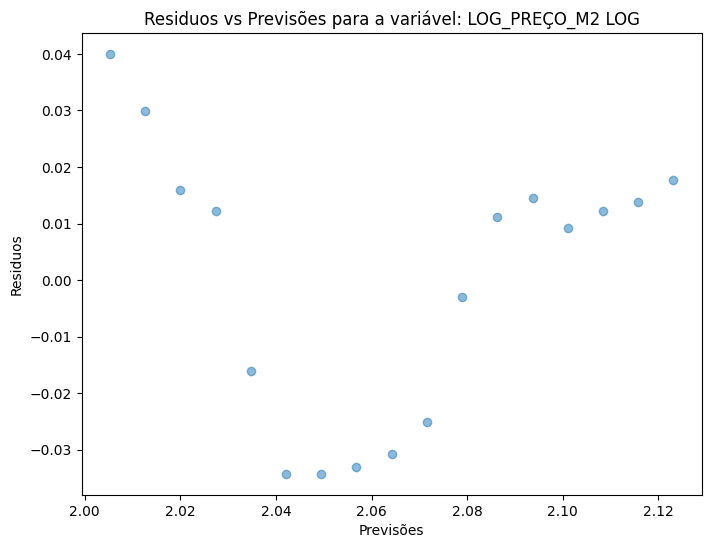

Regress√£o Linear para 'LOG_N_AL LOG':
                            OLS Regression Results                            
Dep. Variable:           log_N_AL log   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     96.32
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           6.39e-08
Time:                        00:13:16   Log-Likelihood:                 6.5638
No. Observations:                  17   AIC:                            -9.128
Df Residuals:                      15   BIC:                            -7.461
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17


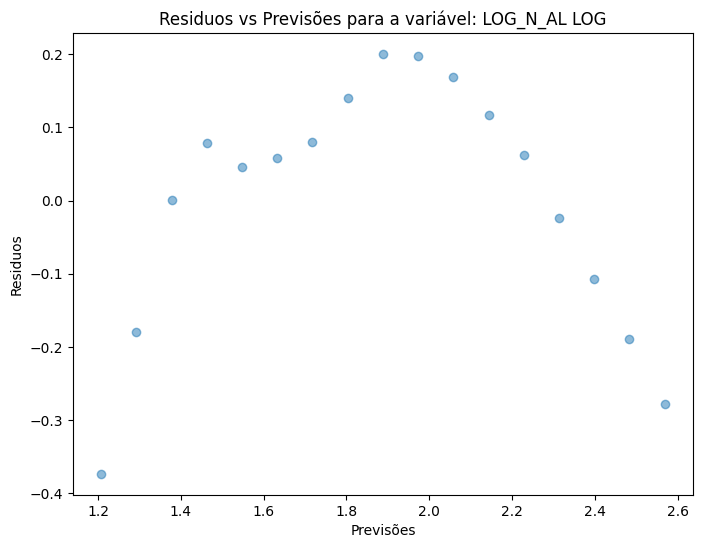

KeyError: 'perc_Juro'

In [17]:
# Supondo que 'df' seja o seu DataFrame com a coluna de anos e as outras colunas num√©ricas
# Copiar o DataFrame original para manter os dados originais
df_transformed = df.copy()

#Como temos valores negativos na variavel de taxa de juro, vamos sumar a essa vari√°vel 0.6
df_transformed["perc_Juro"] = df_transformed["perc_Juro"] + 0.6

for coluna in df_transformed.columns[2:]:  # Come√ßa da terceira coluna em diante
    df_transformed[coluna + ' log'] = np.log(df[coluna])
    
# Select columns that contain the word 'log'
log_columns = [col for col in df_transformed.columns if 'log' in col]
# Add the first column to the list of columns to keep
columns_to_keep = [df_transformed.columns[0]] + log_columns
# Keep only the selected columns
df_transformed = df_transformed[columns_to_keep]

regression_results_a = []

# Iterar sobre as colunas num√©ricas, exceto a coluna de anos
for column in df_transformed.columns[2:]:  # Ignorando as duas primeira coluna que s√£o de anos
    # Realizar a regress√£o linear
    X = sm.add_constant(df_transformed['Anos'])  # Adicionar uma coluna de 1s para o termo constante
    y = df_transformed[column]
    model = sm.OLS(y, X).fit()
    
    # Adicionar os resultados √† nossa lista
    regression_results_a.append((column, model))

# Agora, vamos imprimir o summary para cada regress√£o linear e gerar os gr√°ficos de res√≠duos vs. previs√µes
for column, model in regression_results_a:
    print(f"\033[1mRegress√£o Linear para '{column.upper()}':\033[0m")
    print(model.summary())
    print("="*80)
    
    # Gerar o gr√°fico de res√≠duos vs. previs√µes
    y_pred = model.predict(X)
    residuos = model.resid
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuos, alpha=0.5)
    plt.title(f'Residuos vs Previs√µes para a vari√°vel: {column.upper()}')
    plt.xlabel('Previs√µes')
    plt.ylabel('Residuos')
    plt.show()

df_transformed["perc_Juro"] = df_transformed["perc_Juro"] - 0.6

Vamos escolher Linear para todas pois:

- √© um modelo mais simples e mais intuitivo
- a diferen√ßa no R2 para a exponencial √© reduzida

# Aplicar Varia√ß√µes (Diferen√ßas)

In [18]:
df

Anos   Ano  Pre√ßo_m2   N_AL     N_H    N_D  PIB_AML  IDE_CI_GL  perc_Juro  \
0      0  2007      2279     10  307534   6076    65807       1271       4.82   
1      1  2008      2230     21  311646   5588    67581       1285       3.37   
2      2  2009      2119     53  315757   5772    66436       1651       1.00   
3      3  2010      2182    107  319869   6252    67732       1880       1.25   
4      4  2011      1860    137  323981   6355    66343       2013       1.67   
5      5  2012      1715    227  323597   6789    62528       2034       0.32   
6      6  2013      1812    420  323213   7310    62955       2631       0.37   
7      7  2014      1933   1077  322829   8918    63145       3434       0.18   
8      8  2015      2079   3213  322445  10099    64897       4077      -0.04   
9      9  2016      2300   6367  322062  11066    66942       4180      -0.22   
10    10  2017      2899  10655  321678  12427    70359       4596      -0.27   
11    11  2018      3447  14461  321294  13184    73602       4874      -0.24   
12    12  2019      3763  19530  320910  14264    77439       6128      -0.34   
13    13  2020      3827  19448  320526   3481    71642       6329      -0.52   
14    14  2021      4172  19621  320143   5087    76602       7171      -0.55   
15    15  2022      4498  20245  319759  13200    87368       7782       2.57   
16    16  2023      4946  19535  319375  16042    96325       8073       3.92   

    perc_AL_H  log_Pre√ßo_m2  log_N_AL  
0        0.00          7.73      2.30  
1        0.01          7.71      3.04  
2        0.02          7.66      3.97  
3        0.03          7.69      4.67  
4        0.04          7.53      4.92  
5        0.07          7.45      5.42  
6        0.13          7.50      6.04  
7        0.33          7.57      6.98  
8        0.99          7.64      8.07  
9        1.94          7.74      8.76  
10       3.21          7.97      9.27  
11       4.31          8.15      9.58  
12       5.74          8.23      9.88  
13       5.72          8.25      9.88  
14       5.77          8.34      9.88  
15       5.95          8.41      9.92  
16       5.76          8.51      9.88

In [19]:
# Calcular a diferen√ßa para todas as colunas, exceto as duas primeiras
df_diff = df.iloc[:, 2:].diff()
df_diff = df_diff.drop(0)
# Renomear a coluna adicionando a palavra "dif_" antes do nome
df_diff.rename(columns=lambda x: 'dif_' + x, inplace=True)
df_diff

dif_Pre√ßo_m2  dif_N_AL  dif_N_H   dif_N_D  dif_PIB_AML  dif_IDE_CI_GL  \
1         -49.00     11.00  4112.00   -488.00      1774.00          14.00   
2        -111.00     32.00  4111.00    184.00     -1145.00         366.00   
3          63.00     54.00  4112.00    480.00      1296.00         229.00   
4        -322.00     30.00  4112.00    103.00     -1389.00         133.00   
5        -145.00     90.00  -384.00    434.00     -3815.00          21.00   
6          97.00    193.00  -384.00    521.00       427.00         597.00   
7         121.00    657.00  -384.00   1608.00       190.00         803.00   
8         146.00   2136.00  -384.00   1181.00      1752.00         643.00   
9         221.00   3154.00  -383.00    967.00      2045.00         103.00   
10        599.00   4288.00  -384.00   1361.00      3417.00         416.00   
11        548.00   3806.00  -384.00    757.00      3243.00         278.00   
12        316.00   5069.00  -384.00   1080.00      3837.00        1254.00   
13         64.00    -82.00  -384.00 -10783.00     -5797.00         201.00   
14        345.00    173.00  -383.00   1606.00      4960.00         842.00   
15        326.00    624.00  -384.00   8113.00     10766.00         611.00   
16        448.00   -710.00  -384.00   2842.00      8957.00         291.00   

    dif_perc_Juro  dif_perc_AL_H  dif_log_Pre√ßo_m2  dif_log_N_AL  
1           -1.45           0.00             -0.02          0.74  
2           -2.37           0.01             -0.05          0.93  
3            0.25           0.02              0.03          0.70  
4            0.42           0.01             -0.16          0.25  
5           -1.35           0.03             -0.08          0.50  
6            0.05           0.06              0.06          0.62  
7           -0.19           0.20              0.06          0.94  
8           -0.22           0.65              0.07          1.09  
9           -0.18           0.95              0.10          0.68  
10          -0.05           1.27              0.23          0.51  
11           0.03           1.10              0.17          0.31  
12          -0.10           1.43              0.09          0.30  
13          -0.18          -0.02              0.02         -0.00  
14          -0.03           0.05              0.09          0.01  
15           3.11           0.18              0.08          0.03  
16           1.36          -0.19              0.09         -0.04

# 8. Gr√°fico Temporal para cada vari√°vel

C:\Users\p5768\AppData\Local\Temp\ipykernel_8548\3676399335.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


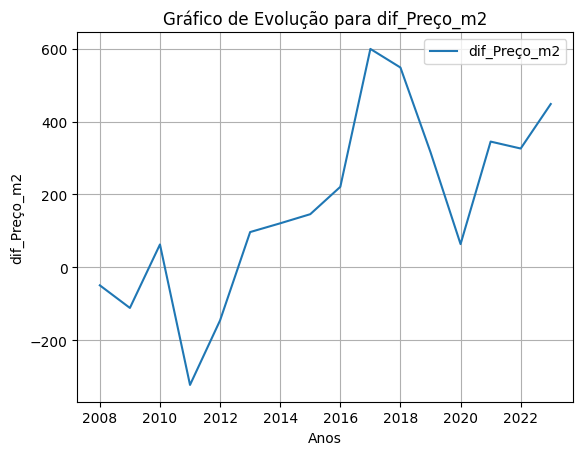

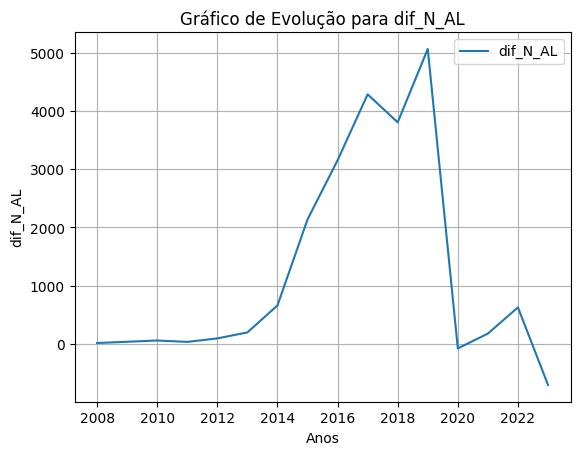

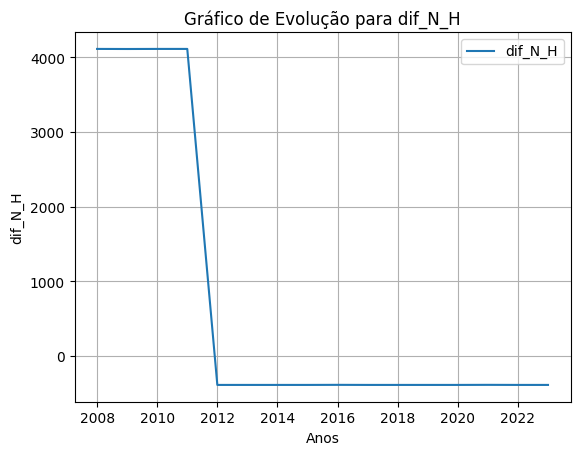

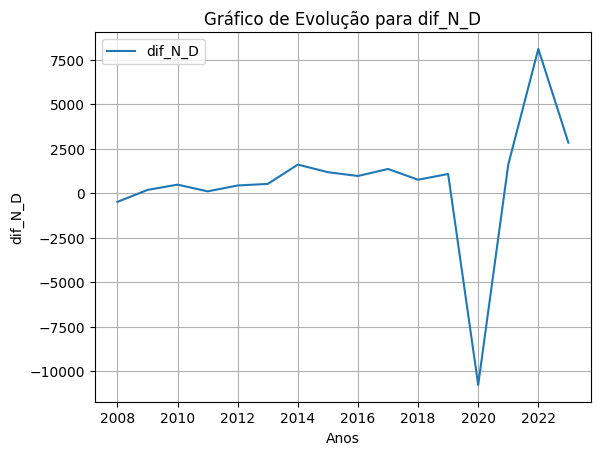

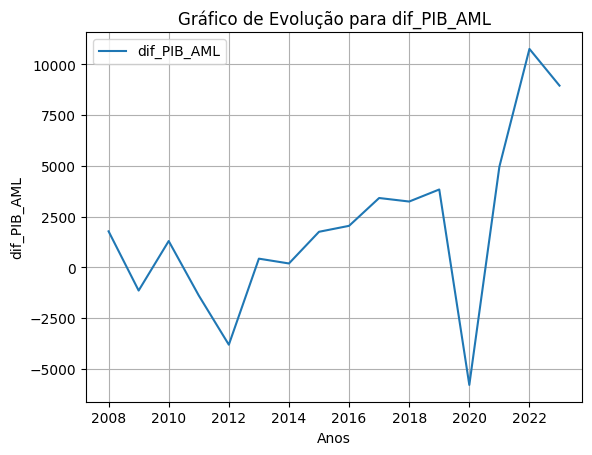

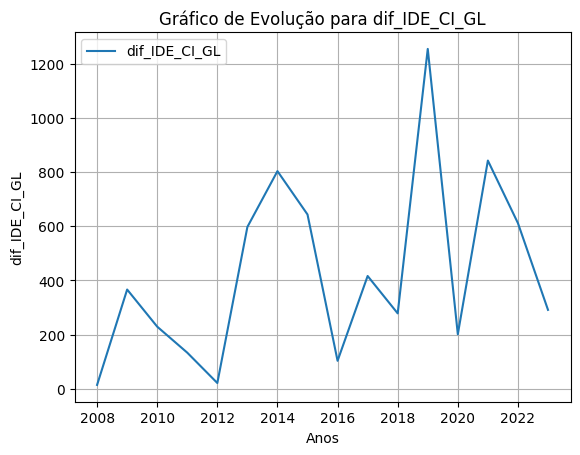

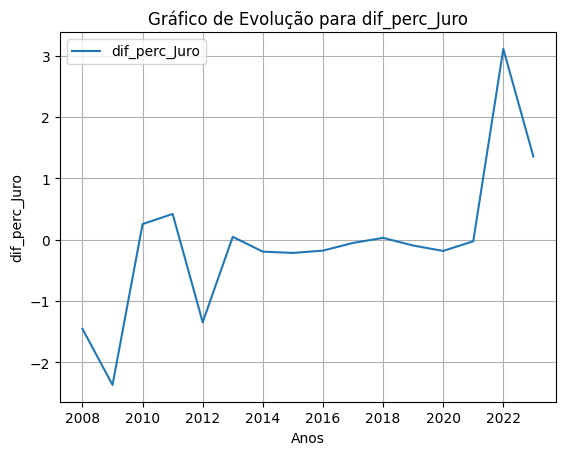

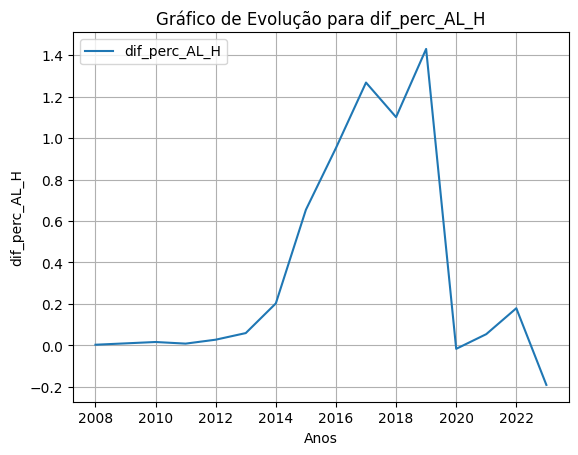

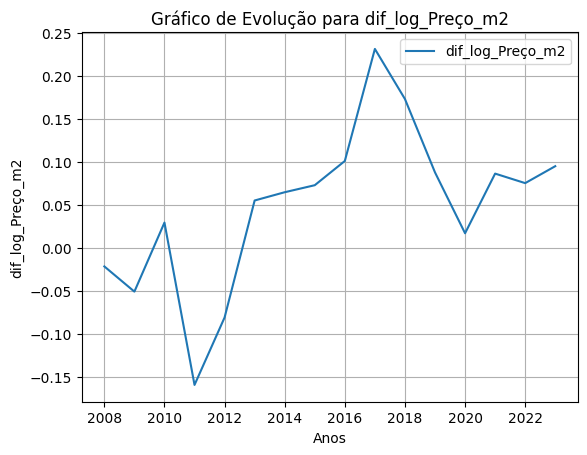

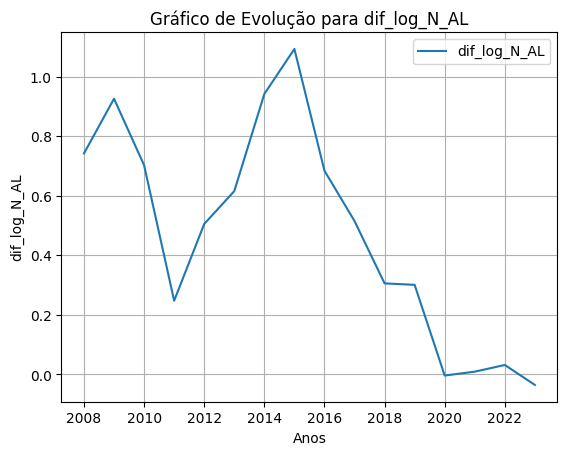

In [20]:
# Adicionar uma nova coluna 'Anos' que vai de 2008 a 2023
df_diff['Anos'] = pd.date_range(start='2008', end='2024', freq='Y').year
# Colocar a coluna 'Anos' como a primeira coluna
df_diff.insert(0, 'Anos', df_diff.pop('Anos'))
# Definir a coluna 'Anos' como o √≠ndice do DataFrame
df_diff.set_index('Anos', inplace=True)

# Plotar um gr√°fico de evolu√ß√£o para cada vari√°vel
for column in df_diff.columns:
    plt.plot(df_diff.index, df_diff[column], label=column)

    # Personalizar r√≥tulos e t√≠tulo para cada vari√°vel
    plt.xlabel('Anos')
    plt.ylabel(f'{column}')
    plt.title(f'Gr√°fico de Evolu√ß√£o para {column}')
    plt.legend()  # Adicionar legenda
    plt.grid(True)  # Adicionar grade
    plt.show()

# 9. Calcular para cada variaÃÅvel a meÃÅdia e desvio padraÃÉo

In [21]:
# Calcular as estat√≠sticas resumidas para todas as colunas do DataFrame
summary_stats = df_diff.describe().T
# Adicionar o nome das colunas como uma nova coluna 'Nome da Coluna'
summary_stats['Nome da Coluna'] = summary_stats.index
# Reordenar as colunas para que 'Nome da Coluna' seja a primeira coluna
summary_stats = summary_stats[['min', 'max', 'mean', 'std']]
# Renomear as colunas para que fiquem mais claras
summary_stats.rename(columns={'min': 'M√≠nimo', 'max': 'M√°ximo', 'mean': 'M√©dia', 'std': 'Desvio Padr√£o'}, inplace=True)
# Exibir a tabela de estat√≠sticas resumidas
summary_stats

M√≠nimo   M√°ximo   M√©dia  Desvio Padr√£o
dif_Pre√ßo_m2       -322.00   599.00  166.69         255.88
dif_N_AL           -710.00  5069.00 1220.31        1837.81
dif_N_H            -384.00  4112.00  740.06        2010.49
dif_N_D          -10783.00  8113.00  622.88        3614.99
dif_PIB_AML       -5797.00 10766.00 1907.38        4188.39
dif_IDE_CI_GL        14.00  1254.00  425.12         343.37
dif_perc_Juro        -2.37     3.11   -0.06           1.20
dif_perc_AL_H        -0.19     1.43    0.36           0.53
dif_log_Pre√ßo_m2     -0.16     0.23    0.05           0.09
dif_log_N_AL         -0.04     1.09    0.47           0.37

# Calcular as regress√µes com ‚àÜY = dif_Pre√ßo_m2 e ‚àÜùëã = dif_N_AL

### ‚àÜùëå = ùõº + ùõΩ ‚àÜùëã

In [22]:
df_diff

dif_Pre√ßo_m2  dif_N_AL  dif_N_H   dif_N_D  dif_PIB_AML  dif_IDE_CI_GL  \
Anos                                                                          
2008        -49.00     11.00  4112.00   -488.00      1774.00          14.00   
2009       -111.00     32.00  4111.00    184.00     -1145.00         366.00   
2010         63.00     54.00  4112.00    480.00      1296.00         229.00   
2011       -322.00     30.00  4112.00    103.00     -1389.00         133.00   
2012       -145.00     90.00  -384.00    434.00     -3815.00          21.00   
2013         97.00    193.00  -384.00    521.00       427.00         597.00   
2014        121.00    657.00  -384.00   1608.00       190.00         803.00   
2015        146.00   2136.00  -384.00   1181.00      1752.00         643.00   
2016        221.00   3154.00  -383.00    967.00      2045.00         103.00   
2017        599.00   4288.00  -384.00   1361.00      3417.00         416.00   
2018        548.00   3806.00  -384.00    757.00      3243.00         278.00   
2019        316.00   5069.00  -384.00   1080.00      3837.00        1254.00   
2020         64.00    -82.00  -384.00 -10783.00     -5797.00         201.00   
2021        345.00    173.00  -383.00   1606.00      4960.00         842.00   
2022        326.00    624.00  -384.00   8113.00     10766.00         611.00   
2023        448.00   -710.00  -384.00   2842.00      8957.00         291.00   

      dif_perc_Juro  dif_perc_AL_H  dif_log_Pre√ßo_m2  dif_log_N_AL  
Anos                                                                
2008          -1.45           0.00             -0.02          0.74  
2009          -2.37           0.01             -0.05          0.93  
2010           0.25           0.02              0.03          0.70  
2011           0.42           0.01             -0.16          0.25  
2012          -1.35           0.03             -0.08          0.50  
2013           0.05           0.06              0.06          0.62  
2014          -0.19           0.20              0.06          0.94  
2015          -0.22           0.65              0.07          1.09  
2016          -0.18           0.95              0.10          0.68  
2017          -0.05           1.27              0.23          0.51  
2018           0.03           1.10              0.17          0.31  
2019          -0.10           1.43              0.09          0.30  
2020          -0.18          -0.02              0.02         -0.00  
2021          -0.03           0.05              0.09          0.01  
2022           3.11           0.18              0.08          0.03  
2023           1.36          -0.19              0.09         -0.04

Esta refer√™ncia sugere que maxlags seja igual a N^(1/4), ou seja, 2

https://stats.stackexchange.com/questions/174149/how-to-determine-the-appropriate-number-of-lags-when-using-newey-west-or-hac-s

In [23]:

reg1 = smf.ols("dif_Pre√ßo_m2 ~ dif_N_AL", data=df_diff).fit()

# Print out the statistics
print(reg1.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     6.887
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0200
Time:                        00:13:41   Log-Likelihood:                -107.75
No. Observations:                  16   AIC:                             219.5
Df Residuals:                      14   BIC:                             221.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7399     95.349      0.731      0.

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


### ‚àÜùëå = ùõº + ùõΩ0‚àÜùëãt + ùõΩ1‚àÜùëãt-1

In [24]:

reg2 = smf.ols("dif_Pre√ßo_m2 ~ dif_N_AL + dif_N_AL.shift(1)", data=df_diff).fit()

# Print out the statistics
print(reg2.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.337
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0704
Time:                        00:13:46   Log-Likelihood:                -101.13
No. Observations:                  15   AIC:                             208.3
Df Residuals:                      12   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            68.6484    106.3

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


### Regress√£o Completa (com vari√°veis de confus√£o)

In [25]:
reg3 = smf.ols("dif_Pre√ßo_m2 ~ dif_N_AL + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro", data=df_diff).fit()

# Print out the statistics
print(reg3.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     64.40
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           6.97e-07
Time:                        00:13:49   Log-Likelihood:                -94.878
No. Observations:                  16   AIC:                             203.8
Df Residuals:                       9   BIC:                             209.2
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        79.1443     44.981      1.75

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [26]:
reg4 = smf.ols("dif_Pre√ßo_m2 ~ dif_N_AL + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro + dif_N_AL.shift(1)", data=df_diff).fit()
 
# Print out the statistics
print(reg4.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     52.82
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.57e-05
Time:                        00:13:52   Log-Likelihood:                -88.090
No. Observations:                  15   AIC:                             192.2
Df Residuals:                       7   BIC:                             197.8
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            64.4315     58.3

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [28]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["dif_N_AL", "Intercept","dif_N_AL.shift(1)","dif_N_H","dif_N_D","dif_PIB_AML","dif_IDE_CI_GL","dif_perc_Juro"])
stargazer


# Calcular as regress√µes com ‚àÜY = dif_Pre√ßo_m2 e ‚àÜùëã = dif_perc_AL_H

In [58]:
reg1 = smf.ols("dif_Pre√ßo_m2 ~ dif_perc_AL_H", data=df_diff).fit()

# Print out the statistics
print(reg1.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     7.158
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0181
Time:                        00:39:16   Log-Likelihood:                -107.69
No. Observations:                  16   AIC:                             219.4
Df Residuals:                      14   BIC:                             220.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        66.9826     95.696      0.70

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [59]:
reg2 = smf.ols("dif_Pre√ßo_m2 ~ dif_perc_AL_H + dif_perc_AL_H.shift(1)", data=df_diff).fit()

# Print out the statistics
print(reg2.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     3.428
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0664
Time:                        00:39:17   Log-Likelihood:                -101.05
No. Observations:                  15   AIC:                             208.1
Df Residuals:                      12   BIC:                             210.2
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 6

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [60]:
reg3 = smf.ols("dif_Pre√ßo_m2 ~ dif_perc_AL_H + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro", data=df_diff).fit()

# Print out the statistics
print(reg3.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     67.94
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           5.52e-07
Time:                        00:39:19   Log-Likelihood:                -94.830
No. Observations:                  16   AIC:                             203.7
Df Residuals:                       9   BIC:                             209.1
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        75.3783     43.889      1.71

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [61]:
reg4 = smf.ols("dif_Pre√ßo_m2 ~ dif_perc_AL_H + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro + dif_perc_AL_H.shift(1)", data=df_diff).fit()
 
# Print out the statistics
print(reg4.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:           dif_Pre√ßo_m2   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     52.15
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.64e-05
Time:                        00:39:21   Log-Likelihood:                -87.985
No. Observations:                  15   AIC:                             192.0
Df Residuals:                       7   BIC:                             197.6
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 5

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [62]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["dif_perc_AL_H", "Intercept","dif_perc_AL_H.shift(1)","dif_N_H","dif_N_D","dif_PIB_AML","dif_IDE_CI_GL","dif_perc_Juro"])
stargazer

# Calcular as regress√µes com ‚àÜY = dif_log_Pre√ßo_m2 e ‚àÜùëã = dif_N_AL

In [63]:
reg1 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_N_AL", data=df_diff).fit()

# Print out the statistics
print(reg1.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     9.565
Date:                Mon, 05 Aug 2024   Prob (F-statistic):            0.00795
Time:                        00:40:50   Log-Likelihood:                 19.627
No. Observations:                  16   AIC:                            -35.25
Df Residuals:                      14   BIC:                            -33.71
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.029      0.292      0.

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [64]:
reg2 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_N_AL + dif_N_AL.shift(1)", data=df_diff).fit()

# Print out the statistics
print(reg2.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     5.729
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0179
Time:                        00:40:52   Log-Likelihood:                 18.127
No. Observations:                  15   AIC:                            -30.25
Df Residuals:                      12   BIC:                            -28.13
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0080      0.0

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [65]:
reg3 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_N_AL + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro", data=df_diff).fit()

# Print out the statistics
print(reg3.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000160
Time:                        00:40:53   Log-Likelihood:                 27.189
No. Observations:                  16   AIC:                            -40.38
Df Residuals:                       9   BIC:                            -34.97
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0161      0.027      0.60

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [66]:
reg4 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_N_AL + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro + dif_N_AL.shift(1)", data=df_diff).fit()
 
# Print out the statistics
print(reg4.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     30.79
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           9.66e-05
Time:                        00:40:54   Log-Likelihood:                 25.381
No. Observations:                  15   AIC:                            -34.76
Df Residuals:                       7   BIC:                            -29.10
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0285      0.0

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [67]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.significant_digits(6)
stargazer.covariate_order(["dif_N_AL", "Intercept","dif_N_AL.shift(1)","dif_N_H","dif_N_D","dif_PIB_AML","dif_IDE_CI_GL","dif_perc_Juro"])
stargazer

# Calcular as regress√µes com ‚àÜY = dif_log_Pre√ßo_m2 e ‚àÜùëã = dif_perc_AL_H

In [68]:
reg1 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_perc_AL_H", data=df_diff).fit()

# Print out the statistics
print(reg1.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 05 Aug 2024   Prob (F-statistic):            0.00608
Time:                        00:41:13   Log-Likelihood:                 19.784
No. Observations:                  16   AIC:                            -35.57
Df Residuals:                      14   BIC:                            -34.02
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0071      0.029      0.24

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [69]:
reg2 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_perc_AL_H + dif_perc_AL_H.shift(1)", data=df_diff).fit()

# Print out the statistics
print(reg2.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     6.263
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0137
Time:                        00:41:14   Log-Likelihood:                 18.280
No. Observations:                  15   AIC:                            -30.56
Df Residuals:                      12   BIC:                            -28.44
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [70]:
reg3 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_perc_AL_H + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro", data=df_diff).fit()

# Print out the statistics
print(reg3.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     19.04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000122
Time:                        00:41:15   Log-Likelihood:                 27.354
No. Observations:                  16   AIC:                            -40.71
Df Residuals:                       9   BIC:                            -35.30
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0141      0.026      0.54

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [71]:
reg4 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_perc_AL_H + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro + dif_perc_AL_H.shift(1)", data=df_diff).fit()
 
# Print out the statistics
print(reg4.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     32.28
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           8.26e-05
Time:                        00:41:16   Log-Likelihood:                 25.486
No. Observations:                  15   AIC:                            -34.97
Df Residuals:                       7   BIC:                            -29.31
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [72]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["dif_perc_AL_H", "Intercept","dif_perc_AL_H.shift(1)","dif_N_H","dif_N_D","dif_PIB_AML","dif_IDE_CI_GL","dif_perc_Juro"])
stargazer

# Calcular as regress√µes com ‚àÜY = dif_log_Pre√ßo_m2 e ‚àÜùëã = dif_log_N_AL

In [73]:
reg1 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_log_N_AL", data=df_diff).fit()

# Print out the statistics
print(reg1.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.3625
Date:                Mon, 05 Aug 2024   Prob (F-statistic):              0.557
Time:                        00:43:48   Log-Likelihood:                 15.576
No. Observations:                  16   AIC:                            -27.15
Df Residuals:                      14   BIC:                            -25.61
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0599      0.037      1.604  

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [74]:
reg2 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_log_N_AL + dif_log_N_AL.shift(1)", data=df_diff).fit()

# Print out the statistics
print(reg2.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                   0.08921
Date:                Mon, 05 Aug 2024   Prob (F-statistic):              0.915
Time:                        00:43:49   Log-Likelihood:                 14.376
No. Observations:                  15   AIC:                            -22.75
Df Residuals:                      12   BIC:                            -20.63
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [75]:
reg3 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_log_N_AL + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro", data=df_diff).fit()

# Print out the statistics
print(reg3.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     23.88
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           4.80e-05
Time:                        00:43:50   Log-Likelihood:                 26.081
No. Observations:                  16   AIC:                            -38.16
Df Residuals:                       9   BIC:                            -32.75
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0209      0.033     -0.64

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


In [76]:
reg4 = smf.ols("dif_log_Pre√ßo_m2 ~ dif_log_N_AL + dif_N_H  + dif_N_D + dif_PIB_AML + dif_IDE_CI_GL + dif_perc_Juro + dif_log_N_AL.shift(1)", data=df_diff).fit()
 
# Print out the statistics
print(reg4.get_robustcov_results(cov_type="HAC", maxlags=2).summary())

                            OLS Regression Results                            
Dep. Variable:       dif_log_Pre√ßo_m2   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     61.08
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           9.58e-06
Time:                        00:43:51   Log-Likelihood:                 26.120
No. Observations:                  15   AIC:                            -36.24
Df Residuals:                       7   BIC:                            -30.58
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0

C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [77]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["dif_log_N_AL", "Intercept","dif_log_N_AL.shift(1)","dif_N_H","dif_N_D","dif_PIB_AML","dif_IDE_CI_GL","dif_perc_Juro"])
stargazer